# Chempy chemical evolution plots

Plots for the method section of Buck et al 2021. Mainly for the purpose of explaining the logic how to synthesize a SSP model for chemical enrichment in cosmological simulations.
We want to explain the paramters and assumptions going into the model as well as their uncertainties and how they impact the reuslt.

In [2]:
%pylab inline
import multiprocessing as mp

Populating the interactive namespace from numpy and matplotlib


In [3]:
#plot styles
#import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)

#sns.set_style('ticks')
#sns.set_style('darkgrid')
#sns.set_context("talk",font_scale=2,rc={"lines.linewidth": 4,"axes.linewidth": 5})

plt.rc('axes', linewidth=3)
plt.rcParams['axes.labelsize'] = 35 #'large'
plt.rcParams['xtick.labelsize'] = 35 #'large'
plt.rcParams['xtick.major.pad'] = 12
plt.rcParams['ytick.labelsize'] = 35 #'large'
plt.rcParams['ytick.major.pad'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
#plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'#'gray'
plt.rcParams["lines.linewidth"] = 3
#plt.rcParams['axes.grid'] = True
#plt.rcParams['grid.color'] = 'lightgray'
#plt.rcParams['grid.linestyle'] = 'dashed' #dashes=(5, 1)
#plt.rcParams['lines.dashed_pattern'] = 10, 3
#plt.rcParams['grid.linewidth'] = 1.5
#plt.rcParams['axes.facecolor'] = 'whitesmoke'
#plt.rcParams['axes.axisbelow'] = True
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.shadow'] = False
plt.rcParams['legend.edgecolor'] = 'lightgray'
plt.rcParams['patch.linewidth'] = 3
plt.rcParams['text.usetex'] = True

In [4]:
from Chempy.parameter import ModelParameters
a = ModelParameters()

In [5]:
# Load solar abundances

from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.5,1024)
time_steps =  np.logspace(-2.47,1.139879,100) #np.linspace(0.,13.82,1024) #1024) #np.logspace(-3,1.139879,100)
# Load the default yields

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback
basic_sn2 = SN2_feedback()
getattr(basic_sn2, 'chieffi04_net')()# 'Nomoto2013_net')() #)() #'chieffi04_net'
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #_yield")() #Karakas16_net

# Load the alternative yields
alt_sn2 = SN2_feedback()
getattr(alt_sn2, 'chieffi04_net')()
alt_1a = SN1a_feedback()
getattr(alt_1a, "Thielemann")()
alt_agb = AGB_feedback()
getattr(alt_agb, "Ventura_net")()

# Use all elements that are traced

elements_to_trace = list(np.unique(basic_agb.elements+basic_sn2.elements+basic_1a.elements+alt_agb.elements+alt_sn2.elements+alt_1a.elements))
#elements_to_trace = ['H','He','C','N','O','Na','Al','Mg','Si','Ca','Ti','Mn','Fe','Ba','Ne']
print('all the traced elements: ',elements_to_trace)
print(len(elements_to_trace))

# Producing the SSP birth elemental fractions (here we use solar)

solar_fractions = []
elements = np.hstack(basic_solar.all_elements)
for item in elements_to_trace:
    solar_fractions.append(float(basic_solar.fractions[np.where(elements==item)]))

all the traced elements:  ['Ag', 'Al', 'Ar', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'He', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'Kr', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Xe', 'Y', 'Yb', 'Zn', 'Zr']
81


In [6]:
# yieldset default
a.yield_table_name_sn2 = 'chieffi04_net' #'chieffi04_net' #'Nomoto2013_net'
a.yield_table_name_agb = 'Karakas16_net' #'Karakas16_net' #_yield'
a.yield_table_name_1a = 'Seitenzahl'
# yieldset alternative
#a.yield_table_name_sn2 = 'chieffi04_net'
#a.yield_table_name_agb = 'Ventura'
#a.yield_table_name_1a = 'Thielemann'

# imf parameters
a.only_net_yields_in_process_tables = True
a.imf_type_name = 'Chabrier_1'
#default
#a.high_mass_slope = -2.46
#alternative
#a.high_mass_slope = -2.51
#a.imf_parameter = (22.8978, 716.4, 0.25, a.high_mass_slope)
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
a.mmin = 0.1
a.mmax = 100
# 100,000,000 mass steps are smooth enough for 1000 time steps
a.mass_steps = 200000 #2000 # 200000
a.sn2mmin = 8.
a.sn2mmax = 40 #100 #40 #100 #40 #100.
a.bhmmin = float(a.sn2mmax) ## maximum of hypernova
a.bhmmax = float(a.mmax) ## maximum of the IMF

a.log_time = False #True
# sn1a delay parameters for maoz
#default
#a.N_0 = np.power(10,-3.07)
#a.sn1a_time_delay = np.power(10,-0.8)
#alternative
#a.N_0 = np.power(10,-3.49)
#a.sn1a_time_delay = np.power(10,-0.88)

#a.sn1a_exponent = 1.12
#a.dummy = 0.0
#a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# sn1a delay parameters for maoz
a.N_0 = np.power(10,-2.9)
a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
#a.sn1a_time_delay = np.power(10,-0.8)
a.sn1a_exponent = 1.12
a.dummy = 0.0
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

######################## END OF SETTING CHEMPY PARAMETER FOR SSP YIELD TABLE PRODUCTION

In [8]:
#SSP Wrapper
from Chempy.wrapper import SSP_wrap

def create_one_SSP_table(parameters):
    differential_table = True # True is the default Chempy behaviour
    metallicity = parameters
    print(metallicity,a.yield_table_name_sn2)
    basic_ssp = SSP_wrap(a)
    basic_ssp.calculate_feedback(metallicity,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)

    x = basic_ssp.agb_table
    y = basic_ssp.sn1a_table
    z = basic_ssp.sn2_table
    s = basic_ssp.bh_table
    d = basic_ssp.table

    u = np.zeros_like(x)
    names = list(u.dtype.names)

    # here we still add all processes, but we can also make individual process contribution to element
    for j,jtem in enumerate(names):
        u[jtem] = x[jtem] + y[jtem] + z[jtem] + s[jtem]
    if differential_table:
        for el in elements_to_trace:
            d[el] = u[el]
    else:
        for el in elements_to_trace:
            d[el] = np.cumsum(u[el])
        for name in ['mass_of_ms_stars_dying', 'mass_in_remnants', 'sn2', 'sn1a', 'pn', 'bh', 'hydrogen_mass_accreted_onto_white_dwarfs', 'unprocessed_ejecta']:
            d[name] = np.cumsum(d[name])
    return(d)

In [9]:
#obs data
data_one = np.asarray([[0.19509647970202676, 0.013859012403933882],[1.3051074191219127, 0.00559798197912329],[7.622302281266133, 0.0002967843150390041]])

x_err = np.asarray([[0.04031272694269973,0.4225229858223506],[0.41813372049260367,2.391579418234672],[2.391579418234672,13.396277245180157]])
y_err = np.asarray([[0.02521011362799125,0.008191922344953684],[0.009643883791544459,0.0027106339043648365],[0.0004422514763163053,0.00023875515424585868]])

data_two = np.asarray([[0.23057477386777842, 0.014112576178114533],[1.4188204439390977, 0.002521011362799125],[7.947430841400854, 0.00018190411331788246]])

x_err2 = np.asarray([[0.03989394912313859,0.4225229858223506],[0.4225229858223506,2.416684488955652],[2.391579418234672,13.396277245180157]])
y_err2 = np.asarray([[0.017542621300415923,0.011149209970080926],[0.003249458715591846,0.0018523222156741222],[0.00022205302450155378,0.00013859012403933895]])

data_three = np.asarray([[3.170544016465083,0.00218063348750633],[4.073590078887669,0.0012889504440725377],[5.630758400486637,0.0008649836012976693],
              [6.585581129489246,0.001000000000000001],[8.373412652636478,0.000612916869592574],[8.63988449483969,0.0004930754569028755],
              [9.491268579601781,0.0005398628767382507],[10.21104746064104,0.00033089106441964994],[11.100728322376185,0.00036228897509242965]])

x_err3 = np.asarray([[2.1999034870767016,4.073590078887669],[2.710856795140266,4.428518909226593],[4.116351680797693,6.382468236417373],
        [5.630758400486637,8.914836421046015],[7.310474696342756,9.102981779915218],[7.947430841400854,10.21104746064104],
        [8.63988449483969,10.535999393686478],[9.198538297760338,11.100728322376185],[10.758358985421784,11.335006374746552]])

y_err3 = np.asarray([[0.003966662010161203,0.0005497401800103742],[0.002760227522090274,0.0006471778159406808],[0.0016613932472747924,0.00019558636830395134],
        [0.0022205302450155357,0.00030221426551783827],[0.001517407974863496,0.00022611569515367476],[0.0006241307649397468,0.00037566708903116],
        [0.0009133346228248634,0.00027602275220902766],[0.00048421626123015127,0.00021414535638539592],[0.0005020967399614471,0.0002521011362799128]])

In [10]:
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)

### SNIA normalization Maoz+2012
this normalization is the integration from 40 Myr to a Hubble time.

In [11]:
# SNIA normalization Maoz+2012
maoz2012 = 0.00130 #SNIA/Msun
maoz2012_err = 0.00015
m11 = 0.002
m11err = 0.0006
graur11 = 0.001
graurerr = 0.0005
cluster = 0.0017
iron = 0.0034

(2.5e-09, 2.1e-05)

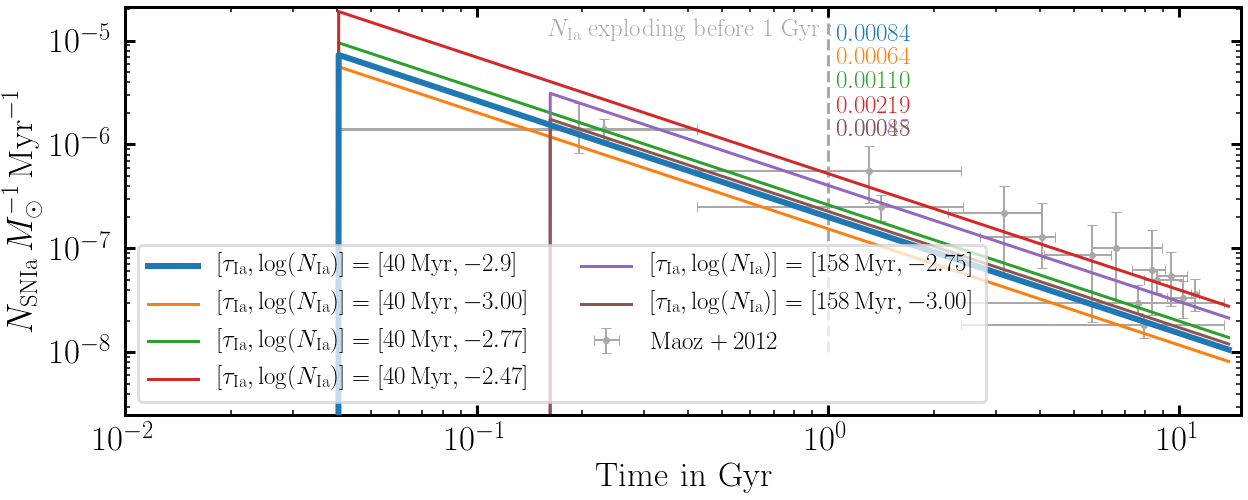

In [14]:
# SNIA delay time distribution
plt.figure(figsize=(20,7.5))

# fiducial Maoz+2012
a.log_time = False
time_steps =  np.linspace(0,13.8,1024)
a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]
basic_ssp_lin = SSP_wrap(a)
basic_ssp_lin.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)
sn1a_lin = basic_ssp_lin.sn1a_table
#i = np.where(sn1a_lin['number_of_events']>0.)
line, = plt.plot(time_steps,sn1a_lin['number_of_events']/(time_steps[1]-time_steps[0])/1000, lw=6, zorder=10, label=r'$[\tau_{\rm Ia},\log(N_{\rm Ia})]=[%.0f\,\rm{Myr},%.1f]$'%(a.sn1a_time_delay*1000,np.log10(a.N_0)))

idx = np.where(time_steps<1)
NIa = np.sum(sn1a_lin['number_of_events'][idx])
plt.annotate(xy = (1.6e-1,1e-5) ,s = r'$N_{\rm Ia}$ $\rm{exploding\,\, before}$ $1$ $\rm{Gyr:}$', fontsize=25, color='darkgray')
plt.annotate(xy = (1.05,1e-5) ,s = r'$%.5f$'%NIa, fontsize=25, color=line.get_color())

#a.log_time = False
#time_steps =  np.linspace(0,13.8,1024)
#a.sn1a_time_delay = np.power(10,-1.39794)
#a.N_0 = m11 #/15.*13.5 #np.power(10,-2.5)
#a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]
#basic_ssp_lin = SSP_wrap(a)
#basic_ssp_lin.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)
#sn1a_lin = basic_ssp_lin.sn1a_table
#plt.plot(time_steps,sn1a_lin['number_of_events']/(time_steps[1]-time_steps[0])/1000, label=r'$[\tau_{\rm Ia},\log(N_{\rm Ia})]=[%.0f\,\rm{Myr},%.1f]$'%(a.sn1a_time_delay*1000,np.log10(a.N_0)))

a.log_time = False
time_steps =  np.linspace(0,13.8,1024)
a.sn1a_time_delay = np.power(10,-1.39794)
a.N_0 = graur11 #/15.*13.5 #np.power(10,-2.5)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]
basic_ssp_lin = SSP_wrap(a)
basic_ssp_lin.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)
sn1a_lin = basic_ssp_lin.sn1a_table
line, = plt.plot(time_steps,sn1a_lin['number_of_events']/(time_steps[1]-time_steps[0])/1000, label=r'$[\tau_{\rm Ia},\log(N_{\rm Ia})]=[%.0f\,\rm{Myr},%.2f]$'%(a.sn1a_time_delay*1000,np.log10(a.N_0)))

idx = np.where(time_steps<1)
NIa = np.sum(sn1a_lin['number_of_events'][idx])
plt.annotate(xy = (1.05,6e-6) ,s = r'$%.5f$'%NIa, fontsize=25, color=line.get_color())

a.log_time = False
time_steps =  np.linspace(0,13.8,1024)
a.sn1a_time_delay = np.power(10,-1.39794)
a.N_0 = cluster #/15.*13.5 #np.power(10,-2.5)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]
basic_ssp_lin = SSP_wrap(a)
basic_ssp_lin.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)
sn1a_lin = basic_ssp_lin.sn1a_table
line, = plt.plot(time_steps,sn1a_lin['number_of_events']/(time_steps[1]-time_steps[0])/1000, label=r'$[\tau_{\rm Ia},\log(N_{\rm Ia})]=[%.0f\,\rm{Myr},%.2f]$'%(a.sn1a_time_delay*1000,np.log10(a.N_0)))

idx = np.where(time_steps<1)
NIa = np.sum(sn1a_lin['number_of_events'][idx])
plt.annotate(xy = (1.05,3.5e-6) ,s = r'$%.5f$'%NIa, fontsize=25, color=line.get_color())


a.log_time = False
time_steps =  np.linspace(0,13.8,1024)
a.sn1a_time_delay = np.power(10,-1.39794)
a.N_0 = iron #/15.*13.5 #np.power(10,-2.5)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]
basic_ssp_lin = SSP_wrap(a)
basic_ssp_lin.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)
sn1a_lin = basic_ssp_lin.sn1a_table
line, = plt.plot(time_steps,sn1a_lin['number_of_events']/(time_steps[1]-time_steps[0])/1000, label=r'$[\tau_{\rm Ia},\log(N_{\rm Ia})]=[%.0f\,\rm{Myr},%.2f]$'%(a.sn1a_time_delay*1000,np.log10(a.N_0)))

idx = np.where(time_steps<1)
NIa = np.sum(sn1a_lin['number_of_events'][idx])
plt.annotate(xy = (1.05,2e-6) ,s = r'$%.5f$'%NIa, fontsize=25, color=line.get_color())


a.log_time = False
time_steps =  np.linspace(0,13.8,1024)
a.sn1a_time_delay = np.power(10,-0.8)
a.N_0 = np.power(10,-2.75)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]
basic_ssp_lin = SSP_wrap(a)
basic_ssp_lin.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)
sn1a_lin = basic_ssp_lin.sn1a_table
line, = plt.plot(time_steps,sn1a_lin['number_of_events']/(time_steps[1]-time_steps[0])/1000, label=r'$[\tau_{\rm Ia},\log(N_{\rm Ia})]=[%.0f\,\rm{Myr},%.2f]$'%(a.sn1a_time_delay*1000,np.log10(a.N_0)))

idx = np.where(time_steps<1)
NIa = np.sum(sn1a_lin['number_of_events'][idx])
plt.annotate(xy = (1.05,1.2e-6) ,s = r'$%.5f$'%NIa, fontsize=25, color=line.get_color())

a.log_time = False
time_steps =  np.linspace(0,13.8,1024)
a.sn1a_time_delay = np.power(10,-0.8)
a.N_0 = np.power(10,-3.)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]
basic_ssp_lin = SSP_wrap(a)
basic_ssp_lin.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)
sn1a_lin = basic_ssp_lin.sn1a_table
line, = plt.plot(time_steps,sn1a_lin['number_of_events']/(time_steps[1]-time_steps[0])/1000, label=r'$[\tau_{\rm Ia},\log(N_{\rm Ia})]=[%.0f\,\rm{Myr},%.2f]$'%(a.sn1a_time_delay*1000,np.log10(a.N_0)))

idx = np.where(time_steps<1)
NIa = np.sum(sn1a_lin['number_of_events'][idx])
plt.annotate(xy = (1.05,1.2e-6) ,s = r'$%.5f$'%NIa, fontsize=25, color=line.get_color())


plt.errorbar(data_one[:,0],data_one[:,1]/1e10*1e6,fmt='o',elinewidth=2,capsize=5,c='darkgray',xerr=[data_one[:,0]-x_err[:,0],x_err[:,1]-data_one[:,0]],yerr=[(data_one[:,1]-y_err[:,0])/1e10*1e6,(y_err[:,1]-data_one[:,1])/1e10*1e6],zorder=-1,label=r'$\rm{Maoz+2012}$')
plt.errorbar(data_two[:,0],data_two[:,1]/1e10*1e6,fmt='o',elinewidth=2,capsize=5,c='darkgray',xerr=[data_two[:,0]-x_err2[:,0],x_err2[:,1]-data_two[:,0]],yerr=[(data_two[:,1]-y_err2[:,0])/1e10*1e6,(y_err2[:,1]-data_two[:,1])/1e10*1e6],zorder=-1)#,label='Maoz+2012')
plt.errorbar(data_three[:,0],data_three[:,1]/1e10*1e6,fmt='o',elinewidth=2,capsize=5,c='darkgray',xerr=[data_three[:,0]-x_err3[:,0],x_err3[:,1]-data_three[:,0]],yerr=[(data_three[:,1]-y_err3[:,0])/1e10*1e6,(y_err3[:,1]-data_three[:,1])/1e10*1e6],zorder=-1)
plt.plot([1,1],[1e-8,1e-4],ls='dashed',c='darkgray',zorder=-2)


plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$N_{\rm SNIa}\,M_\odot^{-1}\,\rm{Myr}^{-1}$')
plt.xlabel(r'$\rm{Time\,\, in\,\, Gyr}$')
#plt.title('some title')
l = plt.legend(loc = 3, ncol=2, facecolor='w', framealpha=0.75, fontsize=25)#, bbox_to_anchor= (1.6,0.5))
l.set_zorder(20)
plt.xlim(1e-2,15)
plt.ylim(2.5e-9,2.1e-5)
#plt.savefig('./paper_plots/delay_time.pdf', bbox_inches='tight')

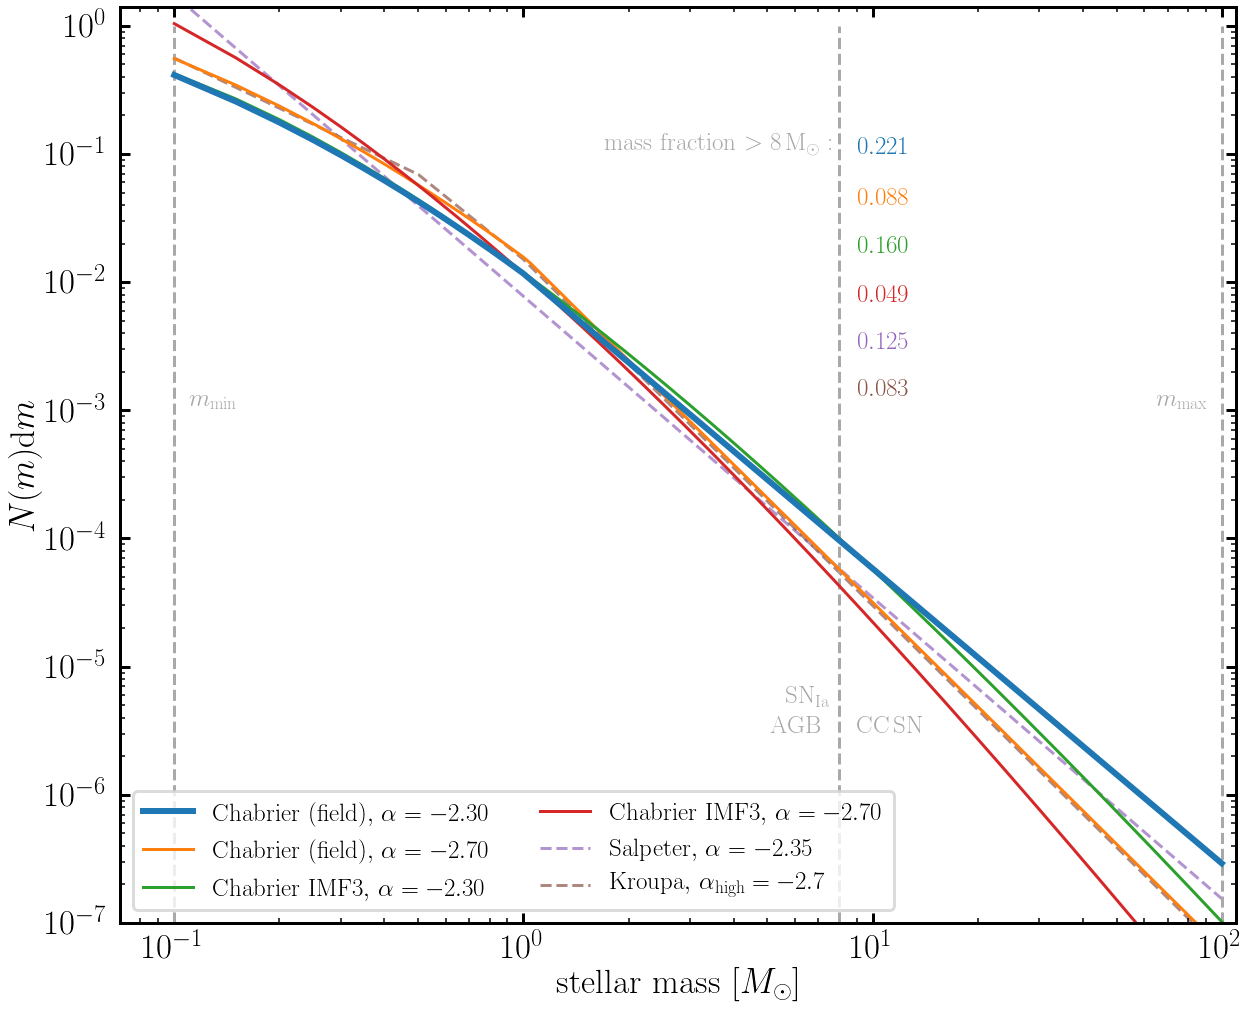

In [234]:
# different IMFs

from Chempy.imf import IMF
plt.figure(figsize=(20,16.85))

a.mass_steps = 2000

plt.plot([a.mmin,a.mmin],[1e-7,1], ls='dashed', c='darkgray')
plt.plot([a.mmax,a.mmax],[1e-7,1], ls='dashed', c='darkgray')
plt.plot([8,8],[1e-7,1], ls='dashed', c='darkgray')
plt.annotate(xy = (a.mmin*1.1,1e-3) ,s = r'$m_{\rm min}$', fontsize=25, color='darkgray')
plt.annotate(xy = (a.mmax*.65,1e-3) ,s = r'$m_{\rm max}$', fontsize=25, color='darkgray')
plt.annotate(xy = (5.1,3e-6) ,s = r'$\rm{SN}_{\rm Ia}$\\\\$\rm{AGB}$', fontsize=25, color='darkgray')
plt.annotate(xy = (9,3e-6) ,s = r'$\rm{CC\,SN}$', fontsize=25, color='darkgray')
plt.annotate(xy = (1.7,1e-1) ,s = r'$\rm{mass}$ $\rm{fraction} > 8\, M_\odot:$', fontsize=25, color='darkgray')

#chabrier
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))
line, = plt.plot(basic_imf.x,basic_imf.dn, lw=6, label = r'$\rm{Chabrier\,\, (field),}$ $\alpha=%.2f$'%a.high_mass_slope, zorder=10)
plt.annotate(xy = (9,1e-1) ,s = r'$%.3f$'%basic_imf.imf_mass_fraction(8.,100.), fontsize=25, color=line.get_color())


#chabrier
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.7
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))
line, = plt.plot(basic_imf.x,basic_imf.dn, label = r'$\rm{Chabrier\,\, (field),}$ $\alpha=%.2f$'%a.high_mass_slope)
plt.annotate(xy = (9,4e-2) ,s = r'$%.3f$'%basic_imf.imf_mass_fraction(8.,100.), fontsize=25, color=line.get_color())


a.imf_type_name = 'Chabrier_2'
#default
a.high_mass_slope = -2.3
#alternative
#a.high_mass_slope = -2.51
a.imf_parameter = (22.8978, 716.4, 0.25, a.high_mass_slope)
#a.chabrier_para1 = 0.69
#a.chabrier_para2 = 0.079
#a.high_mass_slope = -2.3
#a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)

basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.imf_parameter)) #((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))
line, = plt.plot(basic_imf.x,basic_imf.dn, label = r'$\rm{Chabrier\,\, IMF3,}$ $\alpha=%.2f$'%a.high_mass_slope)
plt.annotate(xy = (9,1.7e-2) ,s = r'$%.3f$'%basic_imf.imf_mass_fraction(8.,100.), fontsize=25, color=line.get_color())


a.imf_type_name = 'Chabrier_2'
#default
a.high_mass_slope = -2.7
#alternative
#a.high_mass_slope = -2.51
a.imf_parameter = (22.8978, 716.4, 0.25, a.high_mass_slope)
#a.chabrier_para1 = 0.69
#a.chabrier_para2 = 0.079
#a.high_mass_slope = -2.3
#a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.imf_parameter)) #((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))
line, = plt.plot(basic_imf.x,basic_imf.dn, label = r'$\rm{Chabrier\,\, IMF3,}$ $\alpha=%.2f$'%a.high_mass_slope)
plt.annotate(xy = (9,7e-3) ,s = r'$%.3f$'%basic_imf.imf_mass_fraction(8.,100.), fontsize=25, color=line.get_color())

#Salpeter
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, 'salpeter')((2.35))
line, = plt.plot(basic_imf.x,basic_imf.dn, ls = 'dashed', alpha=0.7, zorder=-1, label = r'$\rm{Salpeter,}$ $\alpha=-2.35$')
plt.annotate(xy = (9,3e-3) ,s = r'$%.3f$'%basic_imf.imf_mass_fraction(8.,100.), fontsize=25, color=line.get_color())

#Kroupa
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, 'normed_3slope')((-1.3,-2.2,-2.7,0.5,1.0))
line, = plt.plot(basic_imf.x,basic_imf.dn, ls = 'dashed', alpha=.7, zorder=-1, label = r'$\rm{Kroupa,}$ $\alpha_{\rm high}=-2.7$')
plt.annotate(xy = (9,1.3e-3) ,s = r'$%.3f$'%basic_imf.imf_mass_fraction(8.,100.), fontsize=25, color=line.get_color())


plt.xlabel(r"$\rm{stellar\,\, mass}$ $[M_\odot]$")
plt.ylabel(r"$N(m){\rm{d}}m$")
plt.yscale('log')
plt.xscale('log')
plt.xlim((0.07,110))
plt.ylim(1e-7,1.4)
plt.legend(loc=3, ncol=2, fontsize=25)
plt.savefig('./paper_plots/imf.pdf', bbox_inches='tight')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/buck/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


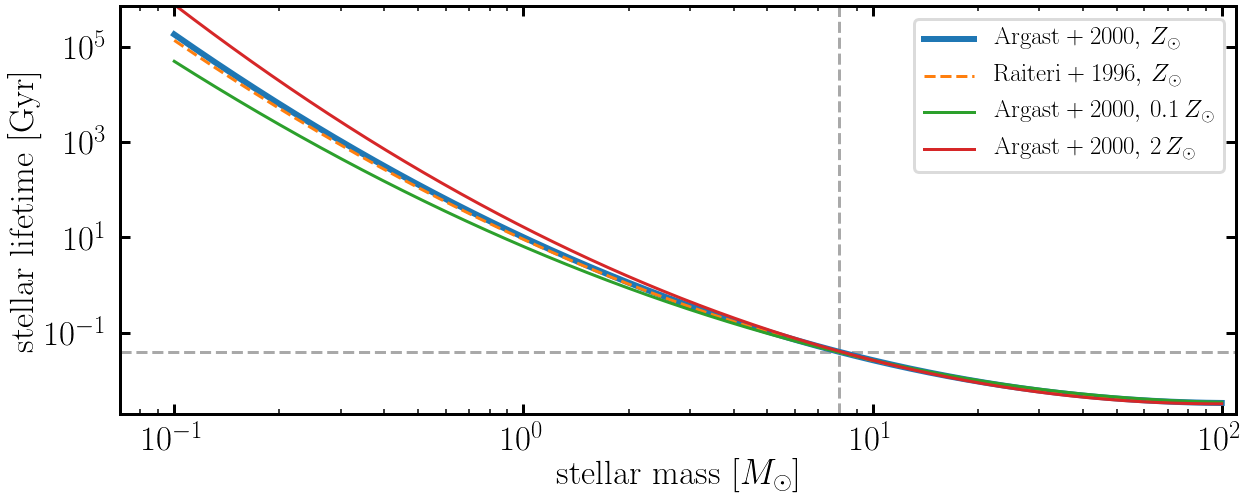

In [226]:
# Here we show the difference of Lifetime calculations

from Chempy.weighted_yield import lifetime_Argast, lifetime_Raiteri
plt.figure(figsize=(20,7.5))

plt.plot([8,8],[2e-3,7e5], ls='dashed', c='darkgray')
plt.plot([0.07,110],[0.04,0.04], ls='dashed', c='darkgray')


metallicity = 0.0134
plt.plot(basic_imf.x,lifetime_Argast(basic_imf.x,metallicity), lw=6, label = r'$\rm{Argast+2000,}$ $Z_\odot$')
plt.plot(basic_imf.x,lifetime_Raiteri(basic_imf.x,metallicity), ls='dashed', label = r'$\rm{Raiteri+1996,}$ $Z_\odot$')

metallicity = 0.0134/10.
plt.plot(basic_imf.x,lifetime_Argast(basic_imf.x,metallicity), label = r'$\rm{Argast+2000,}$ $0.1\,Z_\odot$')

metallicity = 0.0134*2.
plt.plot(basic_imf.x,lifetime_Argast(basic_imf.x,metallicity), label = r'$\rm{Argast+2000,}$ $2\,Z_\odot$')

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rm{stellar\,\, lifetime\,\, [Gyr]}$')
plt.xlabel(r'$\rm{stellar\,\, mass}$ $[M_\odot]$')
plt.xlim((0.07,110))
plt.ylim(2e-3,7e5)
plt.legend(fontsize=25)
plt.savefig('./paper_plots/lifetime.pdf', bbox_inches='tight')

## How does the feedback look like for an SSP?

In [11]:
# Set up the SSP
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()
time_steps_log =  np.logspace(-2.47,1.139879,250)

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "Nomoto2013_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = 'chieffi04_net' #'chieffi04_net' #"Nomoto2013_net" #'chieffi04_net'
a.yield_table_name_agb = "Karakas16_net" #"Karakas16_net" #'Ventura'
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [12]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [13]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log = SSP_wrap(a)
basic_ssp_log.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)


In [15]:
# in log time
list_of_metallicities = np.array([0.0134/100000.]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log2 = SSP_wrap(a)
basic_ssp_log2.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)



In [16]:
# in linear time
a.log_time = False
time_steps =  np.linspace(0,13.8,16384)
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_lin = SSP_wrap(a)
basic_ssp_lin.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps),1.)
#sn1a_lin = basic_ssp_lin.sn1a_table

In [17]:
# Kroupa alternative IMF
alt_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(alt_imf, 'normed_3slope')((-1.3,-2.2,-2.7,0.5,1.0))

# Initialise the SSP class with time-steps
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt = SSP(False, np.copy(basic_solar.z), np.copy(alt_imf.x), np.copy(alt_imf.dm), np.copy(alt_imf.dn), np.copy(time_steps_log), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)
 
basic_ssp_alt.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)

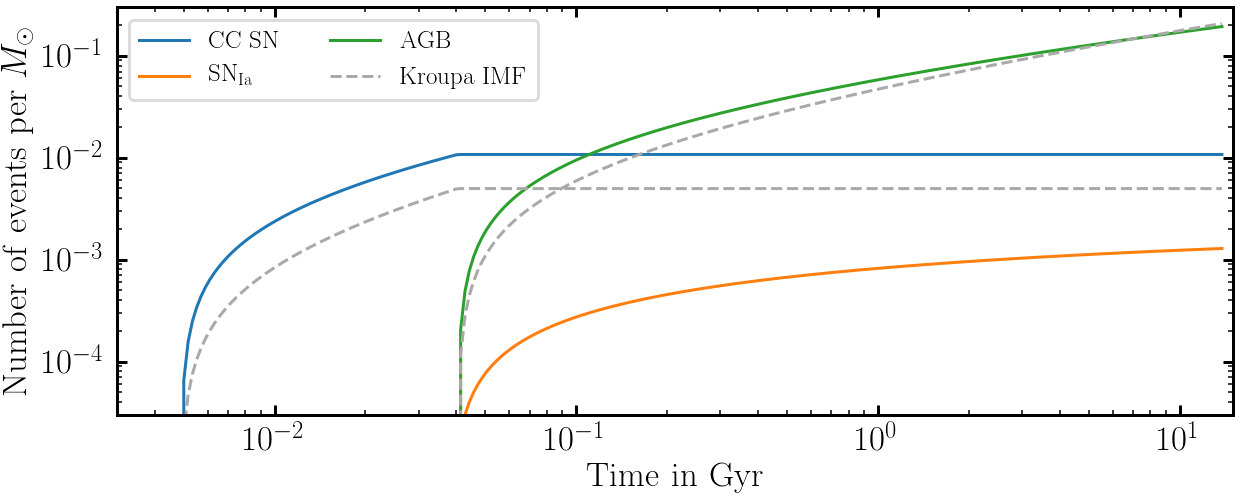

In [45]:
# number of events
plt.figure(figsize=(20,7.5))
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['sn2']), label = r'$\rm{CC}$ $\rm{SN}$')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['sn1a']), label = r'$\rm{SN}_{\rm Ia}$')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['pn']), label = r'$\rm{AGB}$')
#plt.plot(time_steps_log,np.cumsum(basic_ssp_log_alt.table['sn2']), ls='dashed', label = 'CC-SN')
#plt.plot(time_steps_log,np.cumsum(basic_ssp_log_alt.table['sn1a']), ls='dashed', label = 'SN Ia')
#plt.plot(time_steps_log,np.cumsum(basic_ssp_log_alt.table['pn']), ls='dashed', label = 'AGB')
plt.plot(time_steps_log,np.cumsum(basic_ssp_alt.table['sn2']), ls='dashed', c='darkgray', label = r'$\mathrm{Kroupa\,\, IMF}$')
#plt.plot(time_steps,np.cumsum(basic_ssp_alt.table['sn1a']), ls='dashed', c='darkgray')#, label = 'SN Ia')
plt.plot(time_steps_log,np.cumsum(basic_ssp_alt.table['pn']), ls='dashed', c='darkgray',)#, label = 'AGB')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\mathrm{Number\,\, of\,\, events\,\, per}$ $M_\odot$')
plt.xlabel(r'$\mathrm{Time\,\, in\,\, Gyr}$')
#plt.title('Number of events per SSP of 1Msun')
plt.legend(loc = 0, fontsize=25, ncol = 2)
plt.xlim(3e-3,15)
plt.ylim(3e-5,3e-1)
plt.savefig('./paper_plots/number.pdf', bbox_inches='tight')

In [19]:
# normalization for feedback mass fraction 
SNIItot = (basic_ssp_log.table['sn2'])
SNIatot = (basic_ssp_log.table['sn1a'])
AGBtot = (basic_ssp_log.table['pn'])
mybhtable = basic_ssp_log.table['bh']
#mybhtable[1] = 0
BHtot = mybhtable #(basic_ssp_log.table['bh'])
Tot = SNIItot + SNIatot + AGBtot + BHtot

mSNII = np.divide((basic_ssp_log.table['sn2']),Tot)
mSNIa = np.divide((basic_ssp_log.table['sn1a']),Tot)
mAGB = np.divide((basic_ssp_log.table['pn']),Tot)
mBH = np.divide(mybhtable,Tot) #np.divide((basic_ssp_log.table['bh']),Tot)

mSNII[np.where(np.isnan(mSNII))] = 0
mSNIa[np.where(np.isnan(mSNIa))] = 0
mAGB[np.where(np.isnan(mAGB))] = 0
mBH[np.where(np.isnan(mBH))] = 0

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(0.001, 1.5)

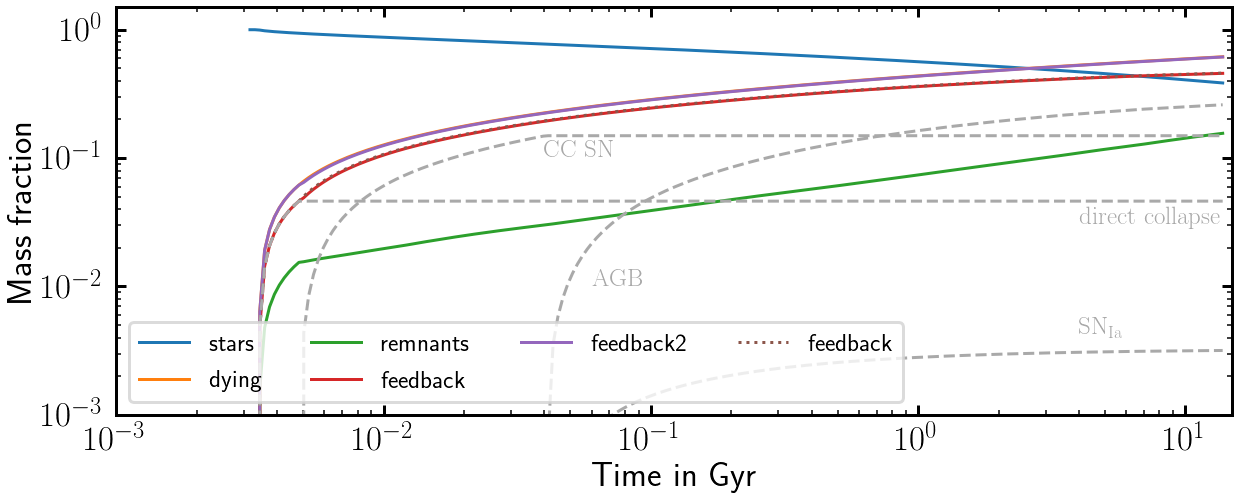

In [22]:
# old version... BH feedback instantaneous
plt.figure(figsize=(20,7.5))

plt.plot(time_steps_log,basic_ssp_log.table['mass_in_ms_stars'], label = 'stars')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']), label = 'dying')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_in_remnants']), label = 'remnants')
line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta']), label = 'feedback')
line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta'])+np.cumsum(basic_ssp_log.table['mass_in_remnants']), label = 'feedback2')
line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']) - np.cumsum(basic_ssp_log.table['mass_in_remnants']), ls='dotted',label = 'feedback')
#plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta']), c='k', label = 'Unprocessed')

# SNII contribution
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mSNII) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mSNII)
plt.plot(time_steps_log, fb, color='darkgray', ls='dashed') #, label=r'$\rm{CC}$ $\rm{SN}$')
plt.annotate(xy = (4e-2,1e-1) ,s = r'$\rm{CC}$ $\rm{SN}$', fontsize=25, color='darkgray')

# SNIa contribution
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mSNIa) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mSNIa)
plt.plot(time_steps_log,fb, color='darkgray', ls='dashed')#, label=r'$\rm{SN}_{\rm{Ia}}$')
plt.annotate(xy = (4,4e-3) ,s = r'$\rm{SN}_{\rm{Ia}}$', fontsize=25, color='darkgray')

# AGB contribution
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mAGB) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mAGB)
plt.plot(time_steps_log,fb * mAGB, color='darkgray', ls='dashed')#, label=r'$\rm{AGB}$')
plt.annotate(xy = (6e-2,1e-2) ,s = r'$\rm{AGB}$', fontsize=25, color='darkgray')

# direct BH collapse
fb = np.cumsum(basic_ssp_log.table['unprocessed_ejecta']*mBH)
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mBH) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mBH)
#fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mBH) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mBH)
plt.plot(time_steps_log,fb, color='darkgray', ls='dashed')#, label=r'$\rm{BH}$')
plt.annotate(xy = (4,3e-2) ,s = r'$\rm{direct}$ $\rm{collapse}$', fontsize=25, color='darkgray')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Mass fraction')
plt.xlabel('Time in Gyr')
#plt.title('Mass of stars gets transformed into remnants and feedback over time')
#plt.legend(loc = 'right', bbox_to_anchor= (1.6,0.5))
plt.legend(loc = 0, fontsize=25, ncol = 4)
plt.xlim(1e-3,15)
plt.ylim(1e-3,1.5)

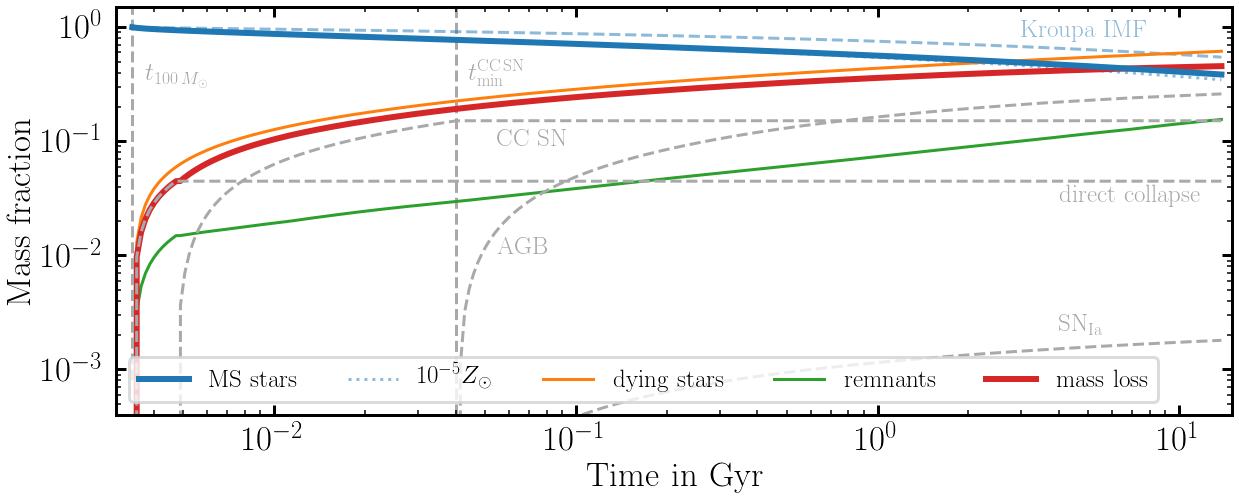

In [31]:
# As is the mass fraction of stars, remnants, dying stars from which the total feedback mass can be calculated
plt.figure(figsize=(20,7.5))

line, = plt.plot(time_steps_log,basic_ssp_alt.table['mass_in_ms_stars'], alpha=0.5, ls='dashed')
plt.annotate(xy = (3,8e-1) ,s = r'$\rm{Kroupa\,\, IMF}$', fontsize=25, alpha=.5, color=line.get_color())
plt.plot(time_steps_log,basic_ssp_log.table['mass_in_ms_stars'], lw=6, color=line.get_color(), label = r'$\rm{MS\,\, stars}$', zorder=10)
plt.plot(time_steps_log,basic_ssp_log2.table['mass_in_ms_stars'], color=line.get_color(), alpha=0.5, ls='dotted', label=r'$10^{-5}Z_\odot$')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']), label = r'$\rm{dying\,\, stars}$')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_in_remnants']), label = r'$\rm{remnants}$')
line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta']), lw=6, label = r'$\rm{mass\,\, loss}$')
#line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta'])+np.cumsum(basic_ssp_log.table['mass_in_remnants']), label = 'feedback2')
#line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']) - np.cumsum(basic_ssp_log.table['mass_in_remnants']), ls='dotted',label = 'feedback')
#plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta']), c='k', label = 'Unprocessed')

# SNII contribution
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mSNII) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mSNII)
plt.plot(time_steps_log, fb, color='darkgray', ls='dashed') #, label=r'$\rm{CC}$ $\rm{SN}$')
plt.annotate(xy = (5.5e-2,9e-2) ,s = r'$\rm{CC}$ $\rm{SN}$', fontsize=25, color='darkgray')

# SNIa contribution
tmp = np.zeros_like(basic_ssp_log.sn1a_table["unprocessed_ejecta"])
for n in basic_ssp_log.sn1a_table.dtype.names[4:]:
    tmp += basic_ssp_log.sn1a_table[n]
    
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mSNIa) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mSNIa)
plt.plot(time_steps_log,np.cumsum(tmp), color='darkgray', ls='dashed')#, label=r'$\rm{SN}_{\rm{Ia}}$')
#plt.plot(time_steps_log,fb, color='darkgray', ls='dashed')#, label=r'$\rm{SN}_{\rm{Ia}}$')
plt.annotate(xy = (4,2.e-3) ,s = r'$\rm{SN}_{\rm{Ia}}$', fontsize=25, color='darkgray')

# AGB contribution
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mAGB) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mAGB)
plt.plot(time_steps_log,fb * mAGB, color='darkgray', ls='dashed')#, label=r'$\rm{AGB}$')
plt.annotate(xy = (5.5e-2,1e-2) ,s = r'$\rm{AGB}$', fontsize=25, color='darkgray')

# direct BH collapse
fb = np.cumsum(basic_ssp_log.table['unprocessed_ejecta']*mBH)
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mBH) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mBH)
#fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mBH) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mBH)
plt.plot(time_steps_log,fb, color='darkgray', ls='dashed')#, label=r'$\rm{BH}$')
plt.annotate(xy = (4,2.9e-2) ,s = r'$\rm{direct}$ $\rm{collapse}$', fontsize=25, color='darkgray')

plt.plot([time_steps_log[0],time_steps_log[0]],[8e-4,1.5], ls='dashed', c='darkgray')
plt.annotate(xy = (time_steps_log[0]*1.1,0.3) ,s = r'$t_{100\,M_\odot}$', fontsize=25, color='darkgray')

#plt.plot([time_steps_log[48],time_steps_log[48]],[8e-4,1.5], ls='dashed', c='darkgray', zorder=-1)
#plt.annotate(xy = (time_steps_log[48]*1.1,0.3) ,s = r'$t_{\rm min}^{\rm CC\,SN}$', fontsize=25, color='darkgray')

plt.plot([0.04,0.04],[4e-4,1.5], ls='dashed', c='darkgray', zorder=-1)
plt.annotate(xy = (0.04*1.1,0.3) ,s = r'$t_{\rm min}^{\rm CC\,SN}$', fontsize=25, color='darkgray')

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rm{Mass\,\, fraction}$')
plt.xlabel(r'$\rm{Time\,\, in\,\, Gyr}$')
#plt.title('Mass of stars gets transformed into remnants and feedback over time')
#plt.legend(loc = 'right', bbox_to_anchor= (1.6,0.5))
plt.legend(loc = 3, fontsize=25, ncol = 5)
plt.xlim(3e-3,15)
plt.ylim(4e-4,1.5)
plt.savefig('./paper_plots/massloss.pdf', bbox_inches='tight')

(0.0008, 1.5)

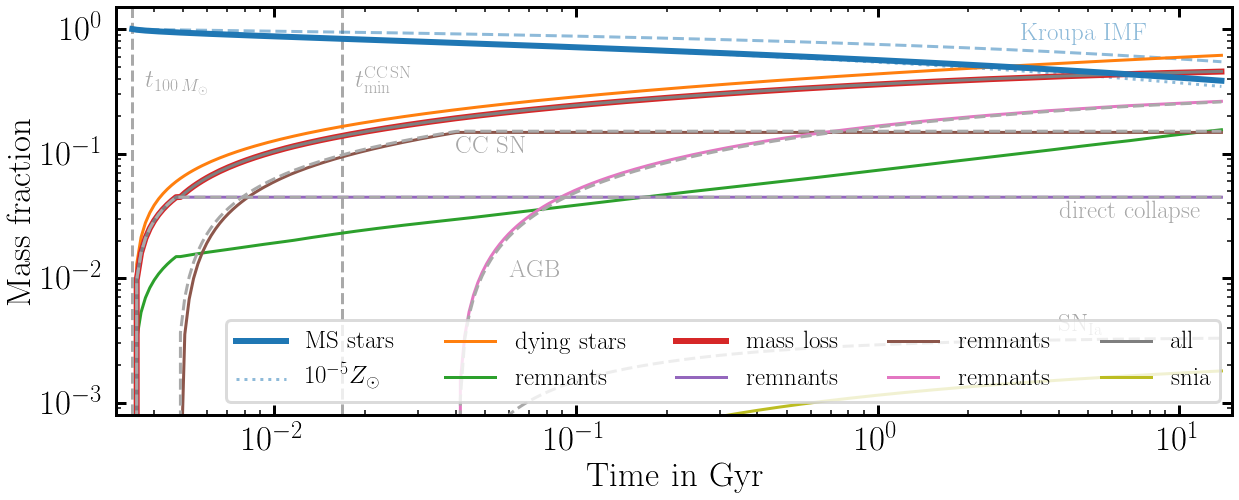

In [26]:
# As is the mass fraction of stars, remnants, dying stars from which the total feedback mass can be calculated
plt.figure(figsize=(20,7.5))

line, = plt.plot(time_steps_log,basic_ssp_alt.table['mass_in_ms_stars'], alpha=0.5, ls='dashed')
plt.annotate(xy = (3,8e-1) ,s = r'$\rm{Kroupa\,\, IMF}$', fontsize=25, alpha=.5, color=line.get_color())
plt.plot(time_steps_log,basic_ssp_log.table['mass_in_ms_stars'], lw=6, color=line.get_color(), label = r'$\rm{MS\,\, stars}$', zorder=10)
plt.plot(time_steps_log,basic_ssp_log2.table['mass_in_ms_stars'], color=line.get_color(), alpha=0.5, ls='dotted', label=r'$10^{-5}Z_\odot$')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']), label = r'$\rm{dying\,\, stars}$')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_in_remnants']), label = r'$\rm{remnants}$')
line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta']), lw=6, label = r'$\rm{mass\,\, loss}$')
#line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta'])+np.cumsum(basic_ssp_log.table['mass_in_remnants']), label = 'feedback2')
#line, = plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']) - np.cumsum(basic_ssp_log.table['mass_in_remnants']), ls='dotted',label = 'feedback')
#plt.plot(time_steps_log,np.cumsum(basic_ssp_log.table['unprocessed_ejecta']), c='k', label = 'Unprocessed')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.bh_table['unprocessed_ejecta']), label = r'$\rm{remnants}$')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table['unprocessed_ejecta']), label = r'$\rm{remnants}$')
plt.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table['unprocessed_ejecta']), label = r'$\rm{remnants}$')
plt.plot(time_steps_log,np.cumsum(tmp)+np.cumsum(basic_ssp_log.sn2_table['unprocessed_ejecta'])+np.cumsum(basic_ssp_log.agb_table['unprocessed_ejecta'])+np.cumsum(basic_ssp_log.bh_table['unprocessed_ejecta']), label = r'$\rm{all}$')

plt.plot(time_steps_log,np.cumsum(tmp), label = r'$\rm{snia}$')

# SNII contribution
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mSNII) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mSNII)
plt.plot(time_steps_log, fb, color='darkgray', ls='dashed') #, label=r'$\rm{CC}$ $\rm{SN}$')
plt.annotate(xy = (4e-2,1e-1) ,s = r'$\rm{CC}$ $\rm{SN}$', fontsize=25, color='darkgray')

# SNIa contribution
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mSNIa) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mSNIa)
plt.plot(time_steps_log,fb, color='darkgray', ls='dashed')#, label=r'$\rm{SN}_{\rm{Ia}}$')
plt.annotate(xy = (4,3.5e-3) ,s = r'$\rm{SN}_{\rm{Ia}}$', fontsize=25, color='darkgray')

# AGB contribution
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mAGB) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mAGB)
plt.plot(time_steps_log,fb * mAGB, color='darkgray', ls='dashed')#, label=r'$\rm{AGB}$')
plt.annotate(xy = (6e-2,1e-2) ,s = r'$\rm{AGB}$', fontsize=25, color='darkgray')

# direct BH collapse
fb = np.cumsum(basic_ssp_log.table['unprocessed_ejecta']*mBH)
fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mBH) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mBH)
#fb = np.cumsum(basic_ssp_log.table['mass_of_ms_stars_dying']*mBH) - np.cumsum(basic_ssp_log.table['mass_in_remnants']*mBH)
plt.plot(time_steps_log,fb, color='darkgray', ls='dashed')#, label=r'$\rm{BH}$')
plt.annotate(xy = (4,3e-2) ,s = r'$\rm{direct}$ $\rm{collapse}$', fontsize=25, color='darkgray')

plt.plot([time_steps_log[0],time_steps_log[0]],[8e-4,1.5], ls='dashed', c='darkgray')
plt.annotate(xy = (time_steps_log[0]*1.1,0.3) ,s = r'$t_{100\,M_\odot}$', fontsize=25, color='darkgray')

plt.plot([time_steps_log[48],time_steps_log[48]],[8e-4,1.5], ls='dashed', c='darkgray', zorder=-1)
plt.annotate(xy = (time_steps_log[48]*1.1,0.3) ,s = r'$t_{\rm min}^{\rm CC\,SN}$', fontsize=25, color='darkgray')

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rm{Mass\,\, fraction}$')
plt.xlabel(r'$\rm{Time\,\, in\,\, Gyr}$')
#plt.title('Mass of stars gets transformed into remnants and feedback over time')
#plt.legend(loc = 'right', bbox_to_anchor= (1.6,0.5))
plt.legend(loc = 4, fontsize=25, ncol = 5)
plt.xlim(3e-3,15)
plt.ylim(8e-4,1.5)
#plt.savefig('./paper_plots/massloss.pdf', bbox_inches='tight')

# the yield return

In [27]:
# find nearest array entry
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

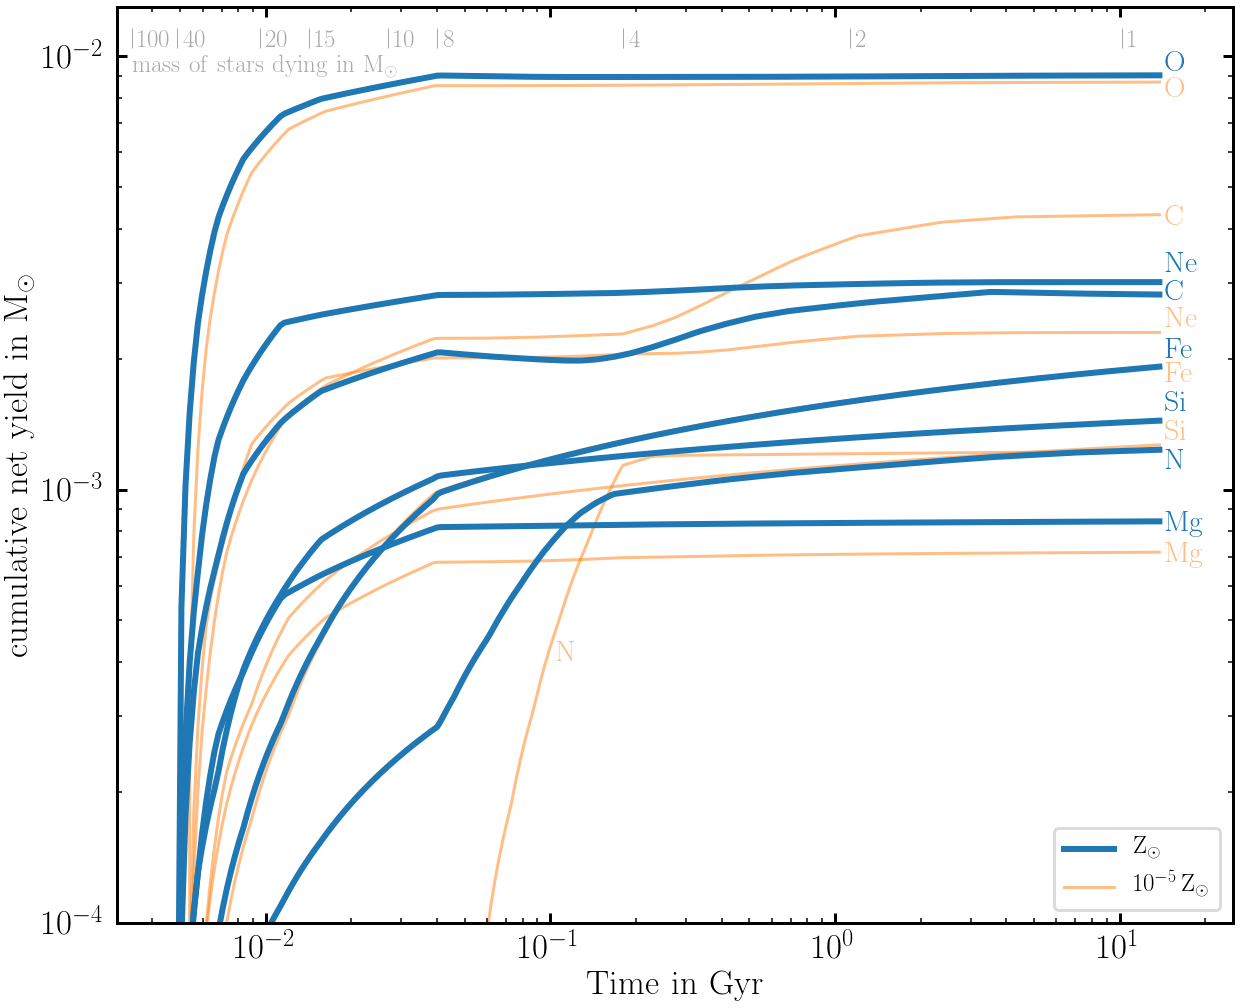

In [252]:
#plottig the result
factor = 1.05
fig = plt.figure(figsize=(20,16.85))
ax = fig.add_subplot(111)

tot = np.cumsum(basic_ssp_log.agb_table["Fe"]) + np.cumsum(basic_ssp_log.sn1a_table["Fe"]) + np.cumsum(basic_ssp_log.sn2_table["Fe"]) + np.cumsum(basic_ssp_log.bh_table["Fe"])
line, = ax.plot(time_steps_log,tot, lw=6, label = r'$\rm{Z_\odot}$')
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = r'$\rm{Fe}$', color = line.get_color(), fontsize=30)

tot2 = np.cumsum(basic_ssp_log2.agb_table["Fe"]) + np.cumsum(basic_ssp_log2.sn1a_table["Fe"]) + np.cumsum(basic_ssp_log2.sn2_table["Fe"]) + np.cumsum(basic_ssp_log2.bh_table["Fe"])
line2, = ax.plot(time_steps_log,tot2, label = r'$10^{-5}\,\rm{Z_\odot}$', alpha=.5, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot2[-1]*.92) ,s = r'$\rm{Fe}$', color = line2.get_color(), alpha=.5, fontsize=30, zorder=-2)

for elem, pos, label in zip(["C", "N", "O", "Mg", "Ne", "Si"],[[.975,.95],[.9,1.06],[1.025,.925],[.95,.95],[1.05,1.025],[1.05,1.025]],[r"$\rm{C}$", r"$\rm{N}$", r"$\rm{O}$", r"$\rm{Mg}$", r"$\rm{Ne}$", r"$\rm{Si}$"]):
    tot = np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem])
    ax.plot(time_steps_log,tot, lw=6, color = line.get_color())
    ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*pos[0]) ,s = label, color = line.get_color(), fontsize=30)

    tot2 = np.cumsum(basic_ssp_log2.agb_table[elem]) + np.cumsum(basic_ssp_log2.sn1a_table[elem]) + np.cumsum(basic_ssp_log2.sn2_table[elem]) + np.cumsum(basic_ssp_log2.bh_table[elem])
    ax.plot(time_steps_log,tot2, color = line2.get_color(),zorder=-2, alpha=.5)
    if elem != "N":
        ax.annotate(xy = (time_steps_log[-1]*factor,tot2[-1]*pos[1]) ,s = label, color = line2.get_color(), alpha=.5, fontsize=30,zorder=-2)
    else:
        ax.annotate(xy = (1.05e-1,4e-4) ,s = label, color = line2.get_color(), alpha=.5, fontsize=30,zorder=-2)


ax.annotate(xy = (time_steps_log[0],9e-3),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],1.1e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,1.05e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)



ax.legend(loc = 0, fontsize=25)

ax.set_ylim(1e-4,1.3e-2)#1.1e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig("./paper_plots/yield_z_chieffi.pdf", bbox_inches='tight')

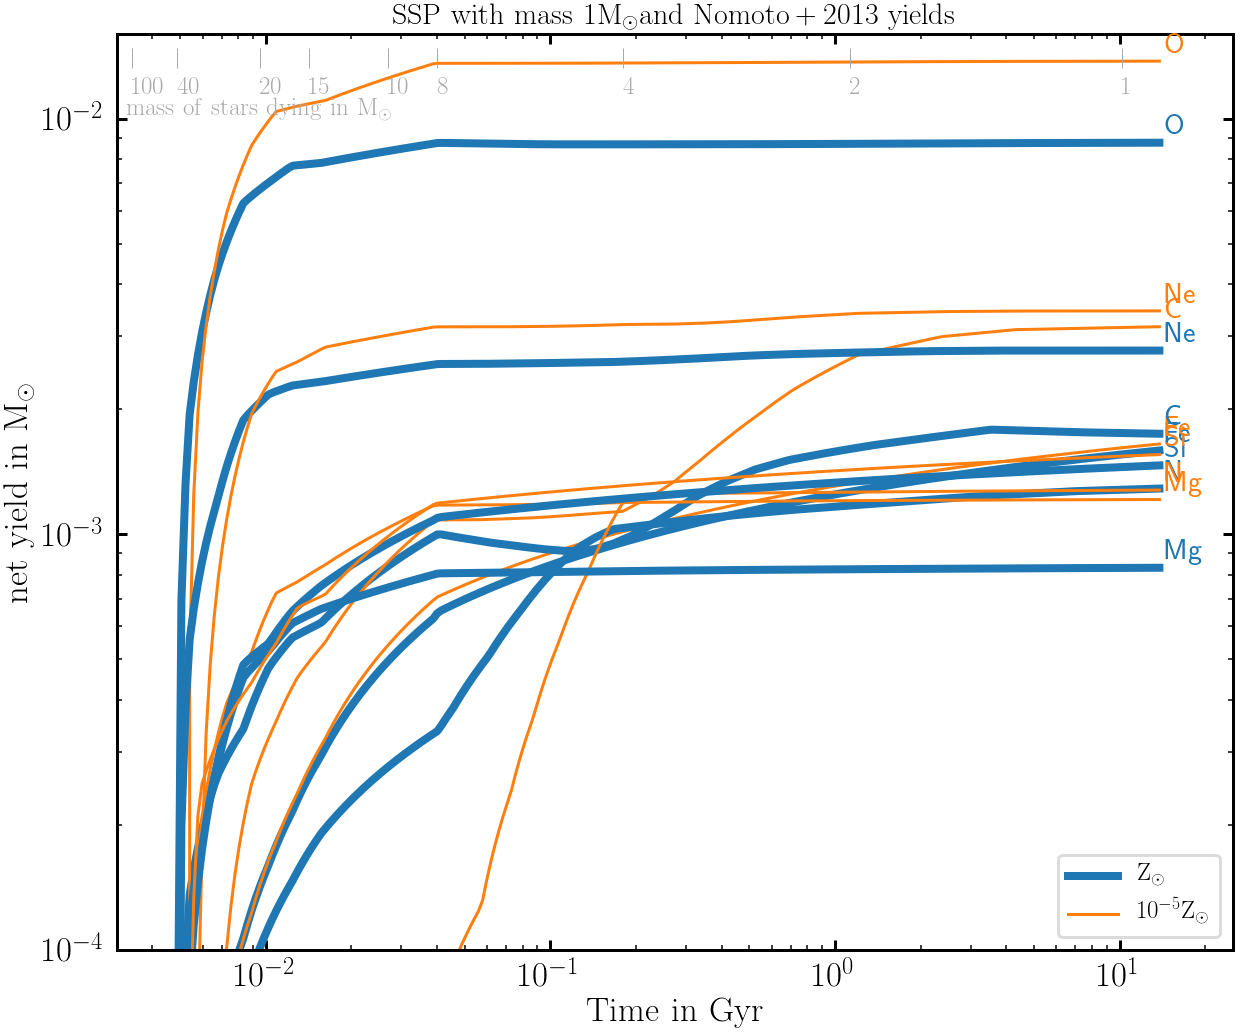

In [76]:
#plottig the result
factor = 1.05
fig = plt.figure(figsize=(20,16.85))
ax = fig.add_subplot(111)

tot = np.cumsum(basic_ssp_log.agb_table["Fe"]) + np.cumsum(basic_ssp_log.sn1a_table["Fe"]) + np.cumsum(basic_ssp_log.sn2_table["Fe"]) + np.cumsum(basic_ssp_log.bh_table["Fe"])
line, = ax.plot(time_steps_log,tot, lw=8, label = r'$\rm{Z_\odot}$')
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = 'Fe', color = line.get_color(), fontsize=30)

tot2 = np.cumsum(basic_ssp_log2.agb_table["Fe"]) + np.cumsum(basic_ssp_log2.sn1a_table["Fe"]) + np.cumsum(basic_ssp_log2.sn2_table["Fe"]) + np.cumsum(basic_ssp_log2.bh_table["Fe"])
line2, = ax.plot(time_steps_log,tot2, label = r'$10^{-5}\rm{Z_\odot}$')
ax.annotate(xy = (time_steps_log[-1]*factor,tot2[-1]*1.05) ,s = 'Fe', color = line2.get_color(), fontsize=30)

for elem in ["C", "N", "O", "Mg", "Ne", "Si"]:
    tot = np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem])
    ax.plot(time_steps_log,tot, lw=8, color = line.get_color())
    ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = elem, color = line.get_color(), fontsize=30)

    tot2 = np.cumsum(basic_ssp_log2.agb_table[elem]) + np.cumsum(basic_ssp_log2.sn1a_table[elem]) + np.cumsum(basic_ssp_log2.sn2_table[elem]) + np.cumsum(basic_ssp_log2.bh_table[elem])
    ax.plot(time_steps_log,tot2, color = line2.get_color())
    ax.annotate(xy = (time_steps_log[-1]*factor,tot2[-1]*1.05) ,s = elem, color = line2.get_color(), fontsize=30)




ax.annotate(xy = (time_steps_log[0]*0.95,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],1.4e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx],1.15e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)



ax.legend(loc = 0, fontsize=25)

ax.set_ylim(1e-4,1.6e-2)#1.1e-2)
ax.set_xlim(3e-3,25)
ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot and\,\, Nomoto+2013\,\, yields}$', fontsize=30)
ax.set_ylabel(r"$\rm{net\,\, yield\,\, in\,\, M_\odot}$")
ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

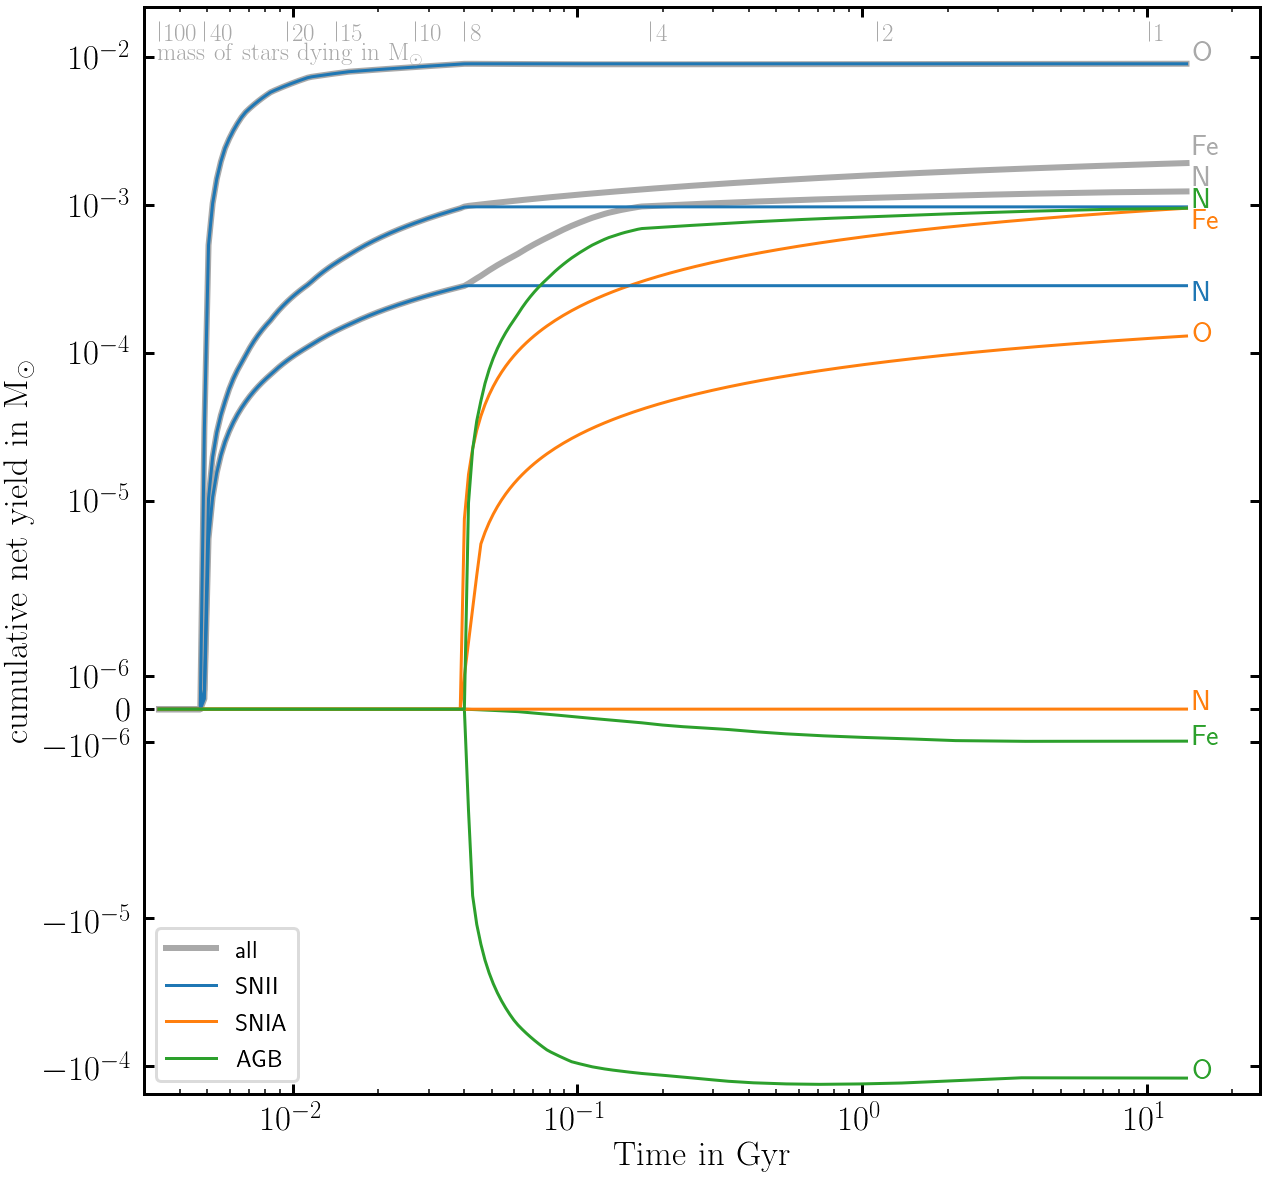

In [342]:
#plottig the result
alpha = 0.5
factor = 1.05

## Actual plotting
factor = 1.05
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

tot = np.cumsum(basic_ssp_log.agb_table["Fe"]) + np.cumsum(basic_ssp_log.sn1a_table["Fe"]) + np.cumsum(basic_ssp_log.sn2_table["Fe"]) + np.cumsum(basic_ssp_log.bh_table["Fe"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = 'all', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.15) ,s = 'Fe',color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Fe"]), label = 'SNII')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Fe"])*1.025) ,s = 'Fe',color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Fe"]), label = 'SNIA')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Fe"])*.725) ,s = 'Fe',color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Fe"]), label = 'AGB')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Fe"])*1.1) ,s = "Fe",color = agb.get_color(), fontsize=30)

tot = np.cumsum(basic_ssp_log.agb_table["O"]) + np.cumsum(basic_ssp_log.sn1a_table["O"]) + np.cumsum(basic_ssp_log.sn2_table["O"]) + np.cumsum(basic_ssp_log.bh_table["O"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = "O",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["O"]), color = sn2.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["O"])*1.025) ,s = "O",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["O"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["O"])*.925) ,s = "O",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["O"]), color=agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["O"])) ,s = "O",color = agb.get_color(), fontsize=30)

tot = np.cumsum(basic_ssp_log.agb_table["N"]) + np.cumsum(basic_ssp_log.sn1a_table["N"]) + np.cumsum(basic_ssp_log.sn2_table["N"]) + np.cumsum(basic_ssp_log.bh_table["N"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.1) ,s = "N",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["N"]), color = sn2.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["N"])*.8) ,s = "N",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["N"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["N"])*.925) ,s = "N",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["N"]), color = agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["N"])*1.01) ,s = "N",color = agb.get_color(), fontsize=30)


ax.annotate(xy = (time_steps_log[0]*.98,9e-3),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],1.5e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,1.3e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-1.55e-4,2.2e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000005)
#ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig("./paper_plots/yield_sources_chieffi.pdf", bbox_inches='tight')

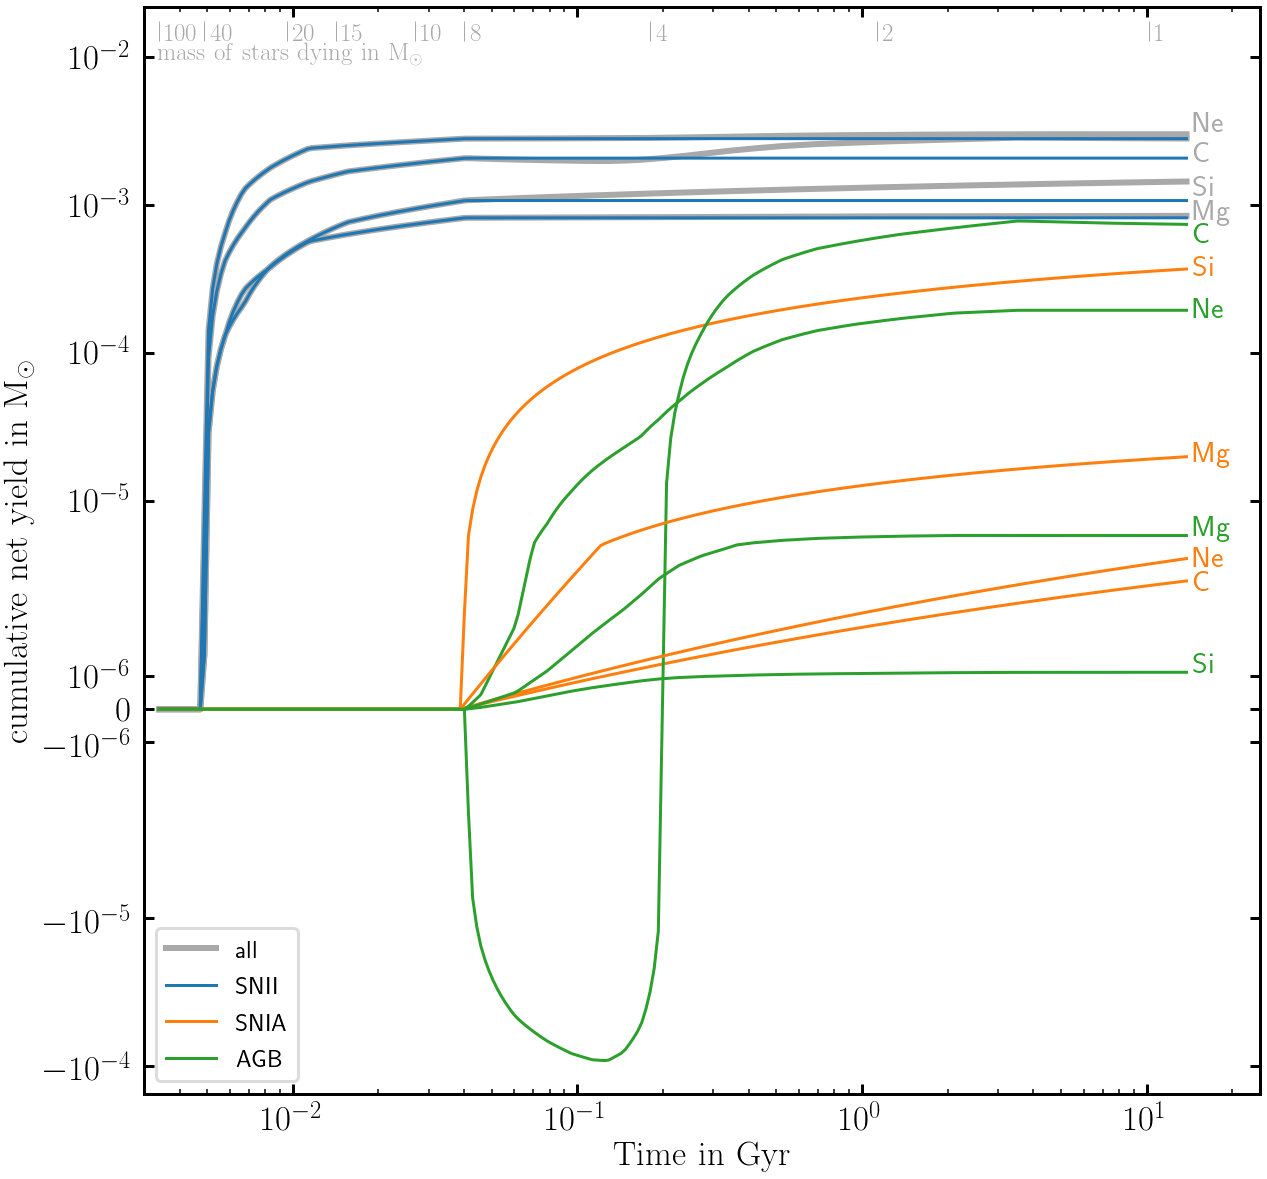

In [343]:
#plottig the result
alpha = 0.5
factor = 1.05

## Actual plotting
factor = 1.05
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

tot = np.cumsum(basic_ssp_log.agb_table["Si"]) + np.cumsum(basic_ssp_log.sn1a_table["Si"]) + np.cumsum(basic_ssp_log.sn2_table["Si"]) + np.cumsum(basic_ssp_log.bh_table["Si"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = 'all', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.8) ,s = "Si",color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Si"]), label = 'SNII')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Si"])*.8) ,s = "Si",color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Si"]), label = 'SNIA')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Si"])*.9) ,s = "Si",color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Si"]), label = 'AGB')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Si"])) ,s = "Si",color = agb.get_color(), fontsize=30)


tot = np.cumsum(basic_ssp_log.agb_table["C"]) + np.cumsum(basic_ssp_log.sn1a_table["C"]) + np.cumsum(basic_ssp_log.sn2_table["C"]) + np.cumsum(basic_ssp_log.bh_table["C"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.7) ,s = "C",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["C"]), color = sn2.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["C"])*.95) ,s = "C",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["C"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["C"])*.925) ,s = "C",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["C"]), color=agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["C"])*.75) ,s = "C",color = agb.get_color(), fontsize=30)


tot = np.cumsum(basic_ssp_log.agb_table["Ne"]) + np.cumsum(basic_ssp_log.sn1a_table["Ne"]) + np.cumsum(basic_ssp_log.sn2_table["Ne"]) + np.cumsum(basic_ssp_log.bh_table["Ne"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = "Ne",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Ne"]), color = sn2.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Ne"])*1.025) ,s = "Ne",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Ne"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Ne"])*.95) ,s = "Ne",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Ne"]), color = agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Ne"])*.9) ,s = "Ne",color = agb.get_color(), fontsize=30)

tot = np.cumsum(basic_ssp_log.agb_table["Mg"]) + np.cumsum(basic_ssp_log.sn1a_table["Mg"]) + np.cumsum(basic_ssp_log.sn2_table["Mg"]) + np.cumsum(basic_ssp_log.bh_table["Mg"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.95) ,s = "Mg",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Mg"]), color = sn2.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Mg"])*.75) ,s = "Mg",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Mg"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Mg"])*.925) ,s = "Mg",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Mg"]), color = agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Mg"])) ,s = "Mg",color = agb.get_color(), fontsize=30)



ax.annotate(xy = (time_steps_log[0]*.98,9e-3),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],1.5e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,1.3e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-1.55e-4,2.2e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000005)
#ax.set_yscale('log')
ax.set_xscale('log')

plt.savefig("./paper_plots/yield_sources_chieffi2.pdf", bbox_inches='tight')

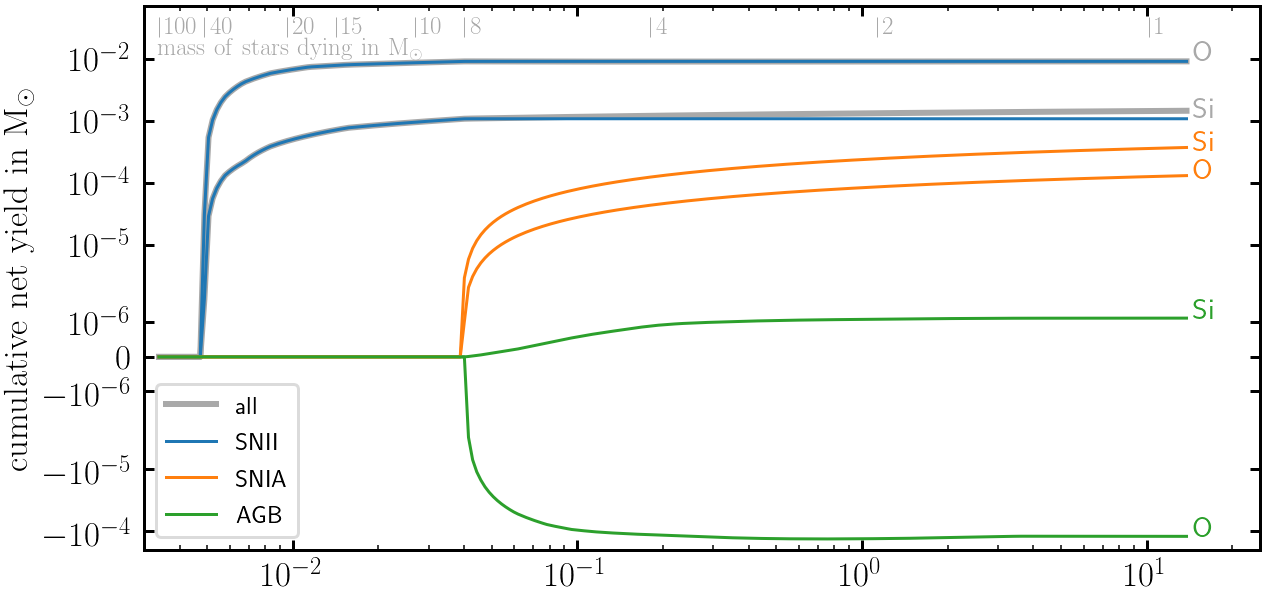

In [430]:
#plottig the result
alpha = 0.5
factor = 1.05

## Actual plotting
factor = 1.05
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

tot = np.cumsum(basic_ssp_log.agb_table["Si"]) + np.cumsum(basic_ssp_log.sn1a_table["Si"]) + np.cumsum(basic_ssp_log.sn2_table["Si"]) + np.cumsum(basic_ssp_log.bh_table["Si"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = 'all', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.8) ,s = "Si",color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Si"]), label = 'SNII')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Si"])*.8) ,s = "Si",color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Si"]), label = 'SNIA')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Si"])*.9) ,s = "Si",color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Si"]), label = 'AGB')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Si"])) ,s = "Si",color = agb.get_color(), fontsize=30)


tot = np.cumsum(basic_ssp_log.agb_table["O"]) + np.cumsum(basic_ssp_log.sn1a_table["O"]) + np.cumsum(basic_ssp_log.sn2_table["O"]) + np.cumsum(basic_ssp_log.bh_table["O"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = "O",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["O"]), color = sn2.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["O"])*1.025) ,s = "O",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["O"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["O"])*.925) ,s = "O",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["O"]), color=agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["O"])) ,s = "O",color = agb.get_color(), fontsize=30)



ax.annotate(xy = (time_steps_log[0]*.98,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],3.25e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,2.6e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-2e-4,7e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
#ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000002)
#ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig("./paper_plots/yield_sources_1.pdf", bbox_inches='tight')

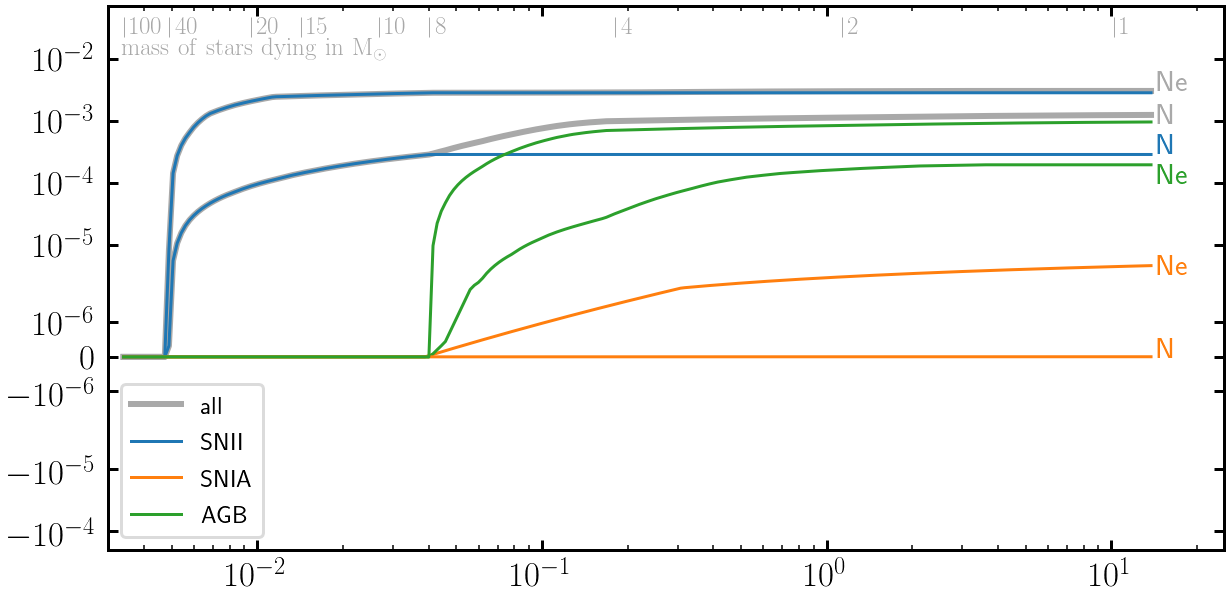

In [429]:
#plottig the result
alpha = 0.5
factor = 1.05

## Actual plotting
factor = 1.05
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)


tot = np.cumsum(basic_ssp_log.agb_table["Ne"]) + np.cumsum(basic_ssp_log.sn1a_table["Ne"]) + np.cumsum(basic_ssp_log.sn2_table["Ne"]) + np.cumsum(basic_ssp_log.bh_table["Ne"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = 'all', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = 'Ne',color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Ne"]), label = 'SNII')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Ne"])*1.025) ,s = 'Fe',color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Ne"]), label = 'SNIA')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Ne"])*.725) ,s = 'Ne',color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Ne"]), label = 'AGB')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Ne"])*.5) ,s = "Ne",color = agb.get_color(), fontsize=30)


tot = np.cumsum(basic_ssp_log.agb_table["N"]) + np.cumsum(basic_ssp_log.sn1a_table["N"]) + np.cumsum(basic_ssp_log.sn2_table["N"]) + np.cumsum(basic_ssp_log.bh_table["N"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.75) ,s = "N",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["N"]), color = sn2.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["N"])*1.05) ,s = "N",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["N"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["N"])*1.25) ,s = "N",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["N"]), color = agb.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["N"])*1.01) ,s = "N",color = agb.get_color(), fontsize=30)



ax.annotate(xy = (time_steps_log[0]*.98,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],3.25e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,2.6e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-2e-4,7e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
#ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
#ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000002)
#ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig("./paper_plots/yield_sources_2.pdf", bbox_inches='tight')

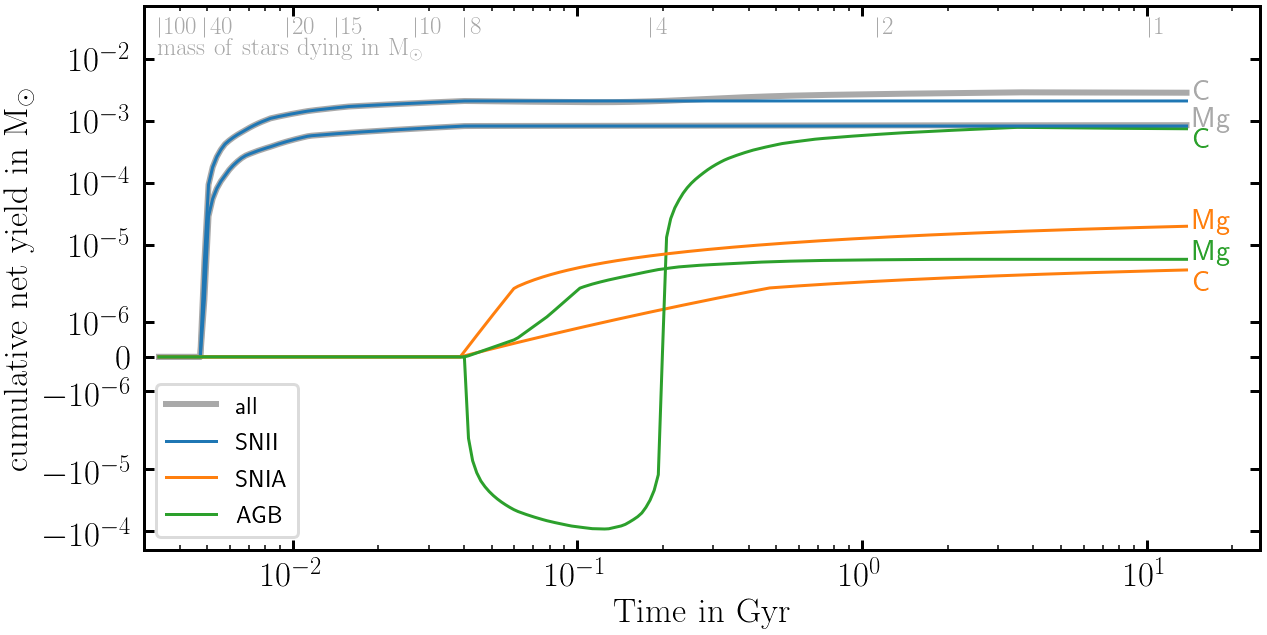

In [425]:
#plottig the result
alpha = 0.5
factor = 1.05

## Actual plotting
factor = 1.05
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)


tot = np.cumsum(basic_ssp_log.agb_table["C"]) + np.cumsum(basic_ssp_log.sn1a_table["C"]) + np.cumsum(basic_ssp_log.sn2_table["C"]) + np.cumsum(basic_ssp_log.bh_table["C"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = 'all', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.8) ,s = "C",color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["C"]), label = 'SNII')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["C"])*.8) ,s = "C",color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["C"]), label = 'SNIA')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["C"])*.5) ,s = "C",color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["C"]), label = 'AGB')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["C"])*.5) ,s = "C",color = agb.get_color(), fontsize=30)


tot = np.cumsum(basic_ssp_log.agb_table["Mg"]) + np.cumsum(basic_ssp_log.sn1a_table["Mg"]) + np.cumsum(basic_ssp_log.sn2_table["Mg"]) + np.cumsum(basic_ssp_log.bh_table["Mg"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.95) ,s = "Mg",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Mg"]), color = sn2.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Mg"])*.75) ,s = "Mg",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Mg"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Mg"])*.925) ,s = "Mg",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Mg"]), color = agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Mg"])) ,s = "Mg",color = agb.get_color(), fontsize=30)


ax.annotate(xy = (time_steps_log[0]*.98,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],3.25e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,2.6e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-2e-4,7e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000002)
#ax.set_yscale('log')
ax.set_xscale('log')

plt.savefig("./paper_plots/yield_sources_3.pdf", bbox_inches='tight')

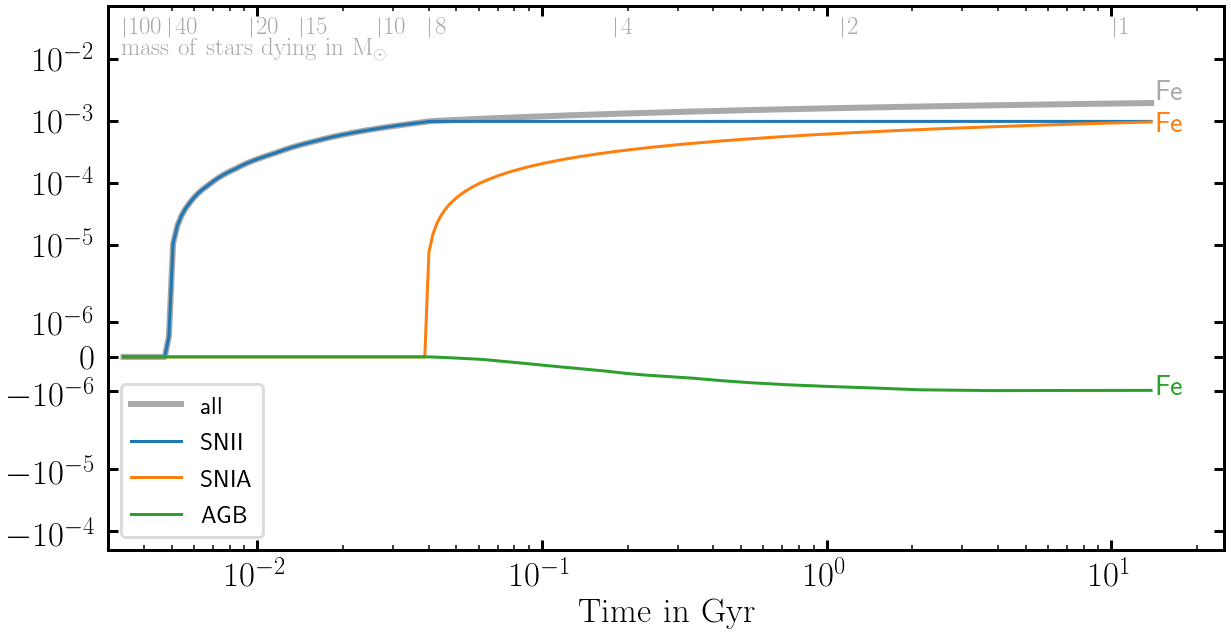

In [428]:
#plottig the result
alpha = 0.5
factor = 1.05

## Actual plotting
factor = 1.05
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

tot = np.cumsum(basic_ssp_log.agb_table["Fe"]) + np.cumsum(basic_ssp_log.sn1a_table["Fe"]) + np.cumsum(basic_ssp_log.sn2_table["Fe"]) + np.cumsum(basic_ssp_log.bh_table["Fe"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = 'all', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.15) ,s = 'Fe',color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Fe"]), label = 'SNII')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Fe"])*1.025) ,s = 'Fe',color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Fe"]), label = 'SNIA')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Fe"])*.725) ,s = 'Fe',color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Fe"]), label = 'AGB')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Fe"])*1.1) ,s = "Fe",color = agb.get_color(), fontsize=30)






ax.annotate(xy = (time_steps_log[0]*.98,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],3.25e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,2.6e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-2e-4,7e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
#ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000002)
#ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig("./paper_plots/yield_sources_4.pdf", bbox_inches='tight')

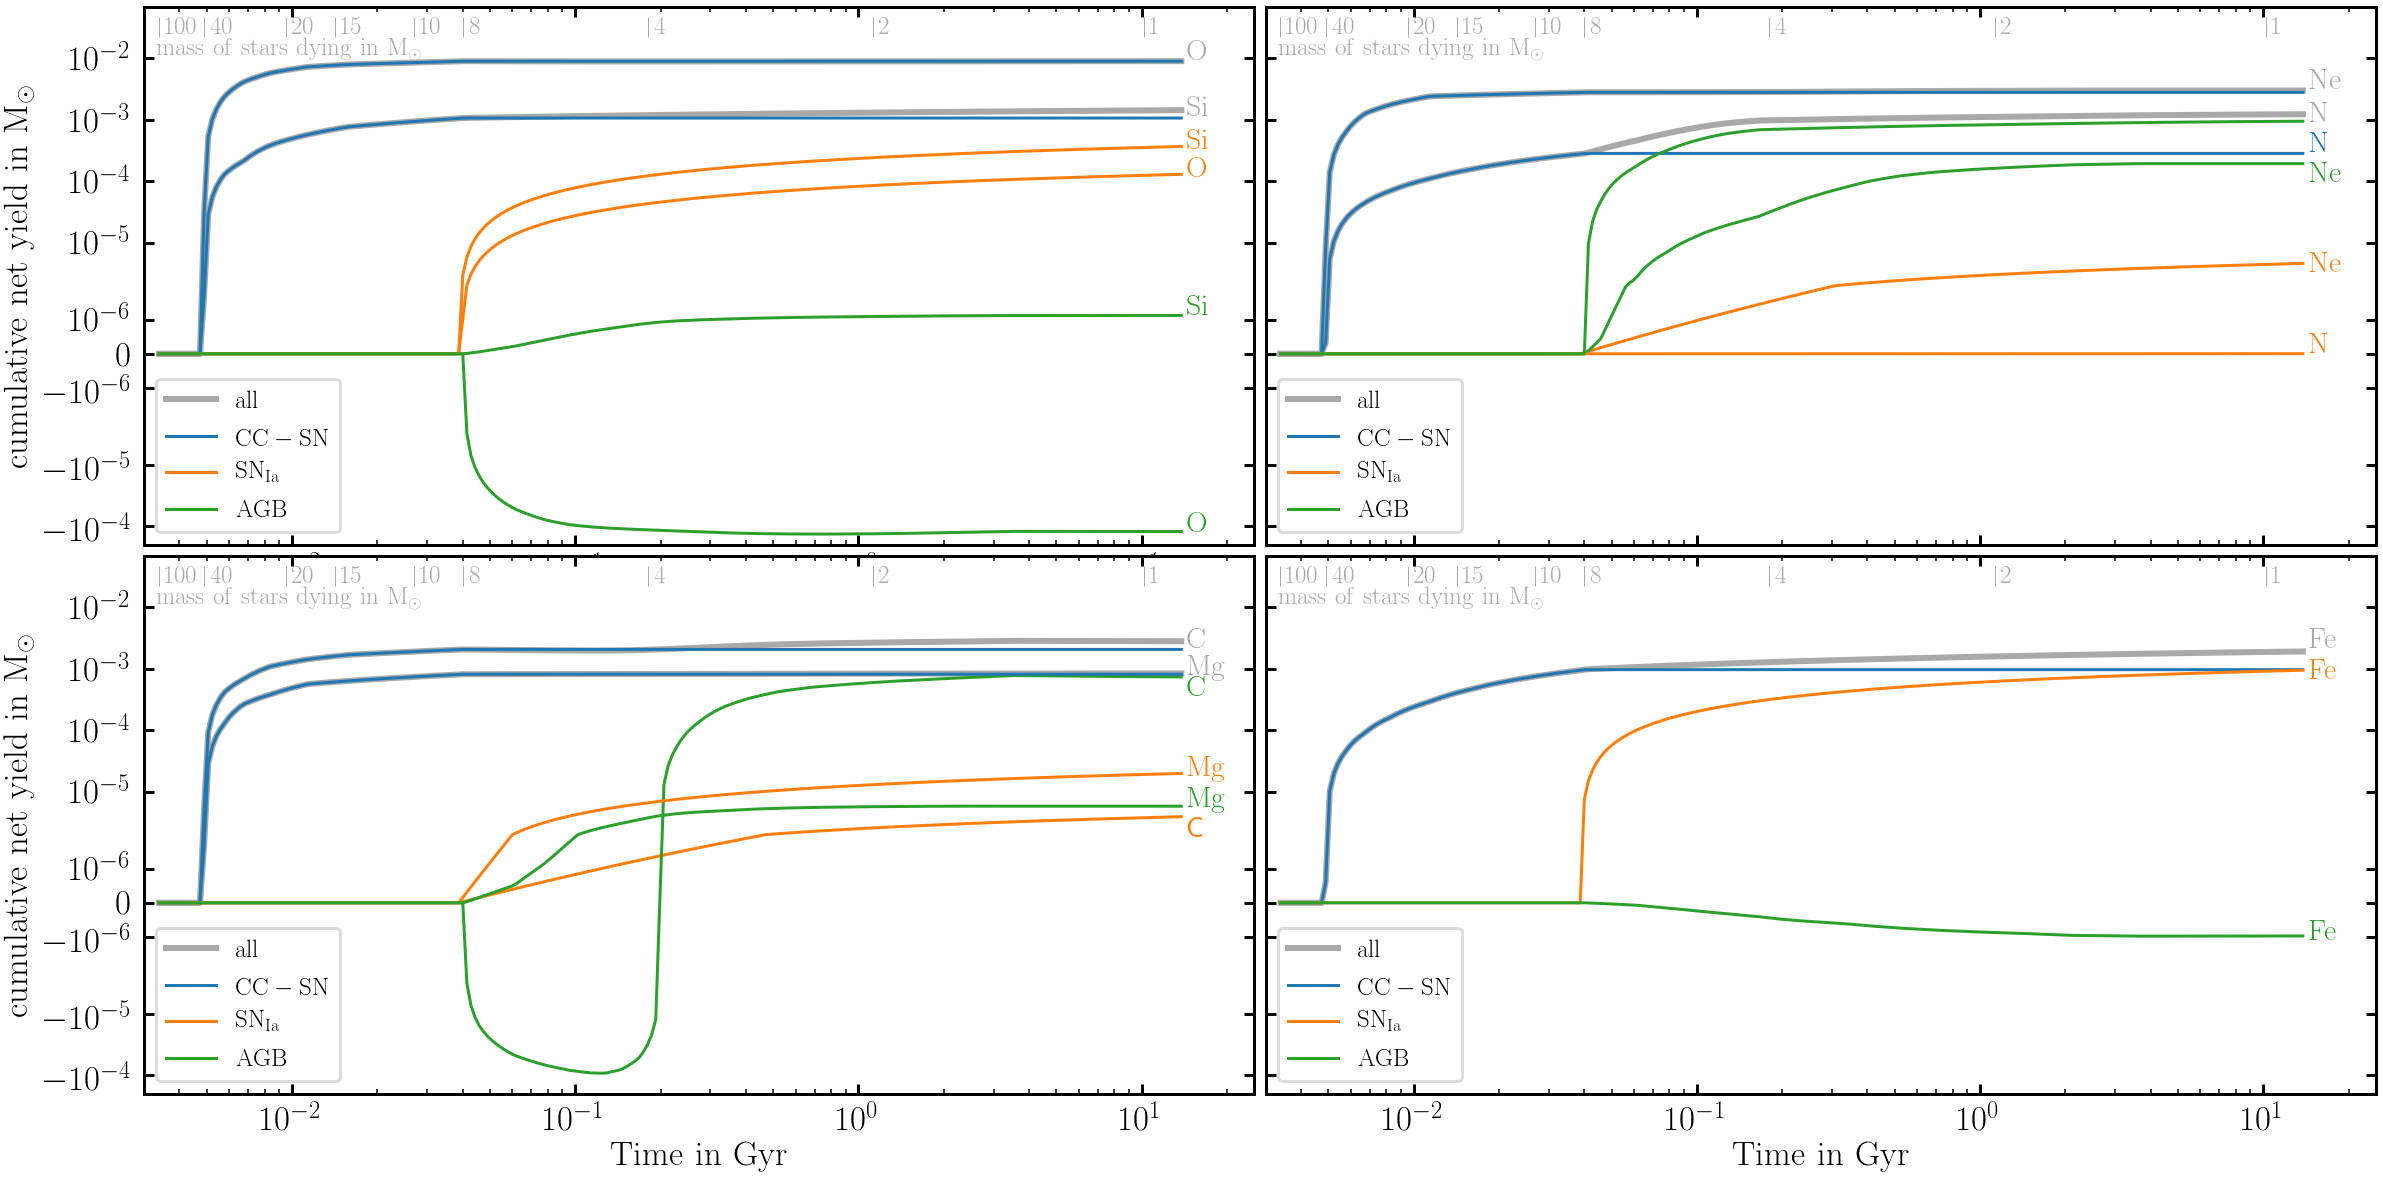

In [256]:
#plottig the result
alpha = 0.5
factor = 1.05

import matplotlib.gridspec as gridspec

## Actual plotting
factor = 1.05
fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1])
gs.update(hspace=0.02, wspace=0.01)

ax = fig.add_subplot(gs[0])

tot = np.cumsum(basic_ssp_log.agb_table["Si"]) + np.cumsum(basic_ssp_log.sn1a_table["Si"]) + np.cumsum(basic_ssp_log.sn2_table["Si"]) + np.cumsum(basic_ssp_log.bh_table["Si"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = r'$\rm{all}$', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.8) ,s = r"$\rm{Si}$",color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Si"]), label = r'$\rm{CC-SN}$')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Si"])*.8) ,s = "Si",color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Si"]), label = r'$\rm{SN_{Ia}}$')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Si"])*.9) ,s = r"$\rm{Si}$",color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Si"]), label = r'$\rm{AGB}$')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Si"])) ,s = r"$\rm{Si}$",color = agb.get_color(), fontsize=30)


tot = np.cumsum(basic_ssp_log.agb_table["O"]) + np.cumsum(basic_ssp_log.sn1a_table["O"]) + np.cumsum(basic_ssp_log.sn2_table["O"]) + np.cumsum(basic_ssp_log.bh_table["O"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = r"$\rm{O}$",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["O"]), color = sn2.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["O"])*1.025) ,s = "O",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["O"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["O"])*.925) ,s = r"$\rm{O}$",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["O"]), color=agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["O"])) ,s = r"$\rm{O}$",color = agb.get_color(), fontsize=30)



ax.annotate(xy = (time_steps_log[0]*.98,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],3.25e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,2.6e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-2e-4,7e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
#ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000002)
#ax.set_yscale('log')
ax.set_xscale('log')
#plt.savefig("./paper_plots/yield_sources_1.pdf", bbox_inches='tight')


#######################################
ax = fig.add_subplot(gs[1])

tot = np.cumsum(basic_ssp_log.agb_table["Ne"]) + np.cumsum(basic_ssp_log.sn1a_table["Ne"]) + np.cumsum(basic_ssp_log.sn2_table["Ne"]) + np.cumsum(basic_ssp_log.bh_table["Ne"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = r'$\rm{all}$', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.05) ,s = r'$\rm{Ne}$',color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Ne"]), label = r'$\rm{CC-SN}$')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Ne"])*1.025) ,s = 'Fe',color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Ne"]), label = r'$\rm{SN_{Ia}}$')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Ne"])*.725) ,s = r'$\rm{Ne}$',color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Ne"]), label = r'$\rm{AGB}$')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Ne"])*.5) ,s = r"$\rm{Ne}$",color = agb.get_color(), fontsize=30)


tot = np.cumsum(basic_ssp_log.agb_table["N"]) + np.cumsum(basic_ssp_log.sn1a_table["N"]) + np.cumsum(basic_ssp_log.sn2_table["N"]) + np.cumsum(basic_ssp_log.bh_table["N"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.75) ,s = r"$\rm{N}$",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["N"]), color = sn2.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["N"])*1.05) ,s = r"$\rm{N}$",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["N"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["N"])*1.25) ,s = r"$\rm{N}$",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["N"]), color = agb.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["N"])*1.01) ,s = "N",color = agb.get_color(), fontsize=30)

ax.annotate(xy = (time_steps_log[0]*.98,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],3.25e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,2.6e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-2e-4,7e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
#ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
#ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000002)
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
#plt.savefig("./paper_plots/yield_sources_2.pdf", bbox_inches='tight')

#######################################
ax = fig.add_subplot(gs[2])

tot = np.cumsum(basic_ssp_log.agb_table["C"]) + np.cumsum(basic_ssp_log.sn1a_table["C"]) + np.cumsum(basic_ssp_log.sn2_table["C"]) + np.cumsum(basic_ssp_log.bh_table["C"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = r'$\rm{all}$', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.8) ,s = r"$\rm{C}$",color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["C"]), label = r'$\rm{CC-SN}$')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["C"])*.8) ,s = "C",color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["C"]), label = r'$\rm{SN_{Ia}}$')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["C"])*.5) ,s = "C",color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["C"]), label = r'$\rm{AGB}$')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["C"])*.5) ,s = r"$\rm{C}$",color = agb.get_color(), fontsize=30)


tot = np.cumsum(basic_ssp_log.agb_table["Mg"]) + np.cumsum(basic_ssp_log.sn1a_table["Mg"]) + np.cumsum(basic_ssp_log.sn2_table["Mg"]) + np.cumsum(basic_ssp_log.bh_table["Mg"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*.95) ,s = r"$\rm{Mg}$",color = 'darkgray', zorder=-2, fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Mg"]), color = sn2.get_color())
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Mg"])*.75) ,s = "Mg",color = sn2.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Mg"]), color = snia.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Mg"])*.925) ,s = r"$\rm{Mg}$",color = snia.get_color(), fontsize=30)
ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Mg"]), color = agb.get_color())
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Mg"])) ,s = r"$\rm{Mg}$",color = agb.get_color(), fontsize=30)


ax.annotate(xy = (time_steps_log[0]*.98,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],3.25e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,2.6e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-2e-4,7e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000002)
#ax.set_yscale('log')
ax.set_xscale('log')

#plt.savefig("./paper_plots/yield_sources_3.pdf", bbox_inches='tight')

#######################################
ax = fig.add_subplot(gs[3])

tot = np.cumsum(basic_ssp_log.agb_table["Fe"]) + np.cumsum(basic_ssp_log.sn1a_table["Fe"]) + np.cumsum(basic_ssp_log.sn2_table["Fe"]) + np.cumsum(basic_ssp_log.bh_table["Fe"])
ax.plot(time_steps_log,tot,'darkgray', lw=6, label = r'$\rm{all}$', zorder=-2)
ax.annotate(xy = (time_steps_log[-1]*factor,tot[-1]*1.15) ,s = r'$\rm{Fe}$',color = 'darkgray', zorder=-2, fontsize=30)
sn2, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn2_table["Fe"]), label = r'$\rm{CC-SN}$')
#ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn2_table["Fe"])*1.025) ,s = 'Fe',color = sn2.get_color(), fontsize=30)
snia, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.sn1a_table["Fe"]), label = r'$\rm{SN_{Ia}}$')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.sn1a_table["Fe"])*.725) ,s = r'$\rm{Fe}$',color = snia.get_color(), fontsize=30)
agb, = ax.plot(time_steps_log,np.cumsum(basic_ssp_log.agb_table["Fe"]), label = r'$\rm{AGB}$')
ax.annotate(xy = (time_steps_log[-1]*factor,np.sum(basic_ssp_log.agb_table["Fe"])*1.1) ,s = r"$\rm{Fe}$",color = agb.get_color(), fontsize=30)


ax.annotate(xy = (time_steps_log[0]*.98,1e-2),s = r'$\rm{mass\,\, of\,\, stars\,\, dying\,\, in\,\, M_\odot}$', color = 'darkgray', fontsize=25)
for numb in [1,2,4,8,10,15,20,40,100]:
    idx = find_nearest(basic_ssp_log.inverse_imf,numb)
    ax.plot(time_steps_log[idx],3.25e-2,marker = '|', markersize = 20, linestyle = '', color = 'darkgray')
    plt.annotate(xy = (time_steps_log[idx]*1.05,2.6e-2),s = r'$%.f$' %(basic_ssp_log.inverse_imf[idx]), color = 'darkgray',fontsize=25)

ax.legend(loc = 0, fontsize=25)

ax.set_ylim(-2e-4,7e-2)
ax.set_xlim(3e-3,25)
#ax.set_title(r'$\rm{SSP\,\, with\,\, mass\,\, 1M_\odot\,\, and\,\, Chieffi+2004\,\, yields}$', fontsize=30)
#ax.set_ylabel(r"$\rm{cumulative\,\, net\,\, yield\,\, in\,\, M_\odot}$")
ax.set_xlabel(r"$\rm{Time\,\, in\,\, Gyr}$")

ax.set_yscale('symlog', linthreshy=0.000002)
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticklabels([])
plt.savefig("./paper_plots/yield_sources.pdf", bbox_inches='tight')

In [39]:
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
           'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']

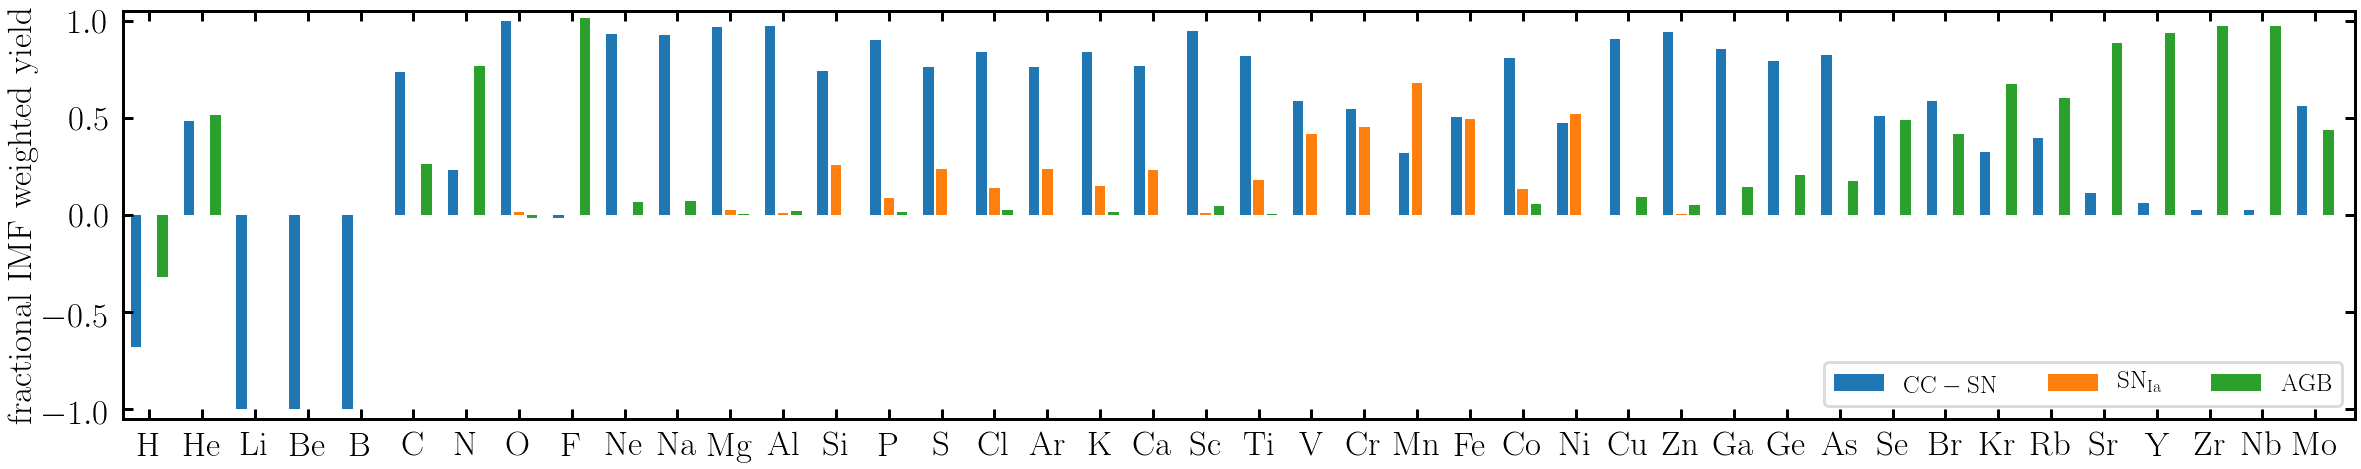

In [257]:
#plottig the result

## Actual plotting
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(40,7.5))#, dpi=100)
ax = fig.add_subplot(111)

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
           'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']
element_names = [r"$\rm{H}$", r"$\rm{He}$", r"$\rm{Li}$", r"$\rm{Be}$", r"$\rm{B}$", r"$\rm{C}$", r"$\rm{N}$", r"$\rm{O}$", r"$\rm{F}$", r"$\rm{Ne}$", r"$\rm{Na}$", r"$\rm{Mg}$", r"$\rm{Al}$", r"$\rm{Si}$", r"$\rm{P}$", r"$\rm{S}$", r"$\rm{Cl}$", r"$\rm{Ar}$", r"$\rm{K}$",
           r"$\rm{Ca}$", r"$\rm{Sc}$", r"$\rm{Ti}$", r"$\rm{V}$", r"$\rm{Cr}$", r"$\rm{Mn}$", r"$\rm{Fe}$", r"$\rm{Co}$", r"$\rm{Ni}$", r"$\rm{Cu}$", r"$\rm{Zn}$", r"$\rm{Ga}$", r"$\rm{Ge}$", r"$\rm{As}$", r"$\rm{Se}$", r"$\rm{Br}$", r"$\rm{Kr}$", r"$\rm{Rb}$", r"$\rm{Sr}$", r"$\rm{Y}$", r"$\rm{Zr}$", r"$\rm{Nb}$", r"$\rm{Mo}$"]

for i, elem in enumerate(elements):
    #if elem != 'H':
    tot = np.abs(np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem]))
    #plt.bar(i,np.cumsum(z[elem])[-1], color='k')
    plt.bar(4*(i+1),np.cumsum(basic_ssp_log.sn2_table[elem])[-1]/tot[-1], color='tab:blue')
    plt.bar(4*(i+1)+1,np.cumsum(basic_ssp_log.sn1a_table[elem])[-1]/tot[-1], color='tab:orange')
    plt.bar(4*(i+1)+2,np.cumsum(basic_ssp_log.agb_table[elem])[-1]/tot[-1], color='tab:green')
    #plt.annotate(xy = (5*i,-0.1) ,s = elem,color = 'k', fontsize=30)

plt.bar(0,1e-3,color='tab:blue', label=r'$\rm{CC-SN}$')
plt.bar(0,1e-3,color='tab:orange', label=r'$\rm{SN_{Ia}}$')
plt.bar(0,1e-3,color='tab:green', label=r'$\rm{AGB}$')
ax.legend(loc = 4, ncol=3, fontsize=25)

#ax.set_ylim(9e-5,1.1e-2)
#ax.set_xlim(6e-3,25)
#ax.set_title(r'SSP with mass = 1M$_\odot$ for $Z=0.01$', fontsize=30)
#ax.set_ylabel(r"net yield in $M_\odot$")
#ax.set_xlabel("time in Gyr")


plt.xticks(np.arange(4,4*(len(elements)+1),4)+1, element_names)
#plt.vlines(np.arange(5,5*(len(elements)+1),5)+1,-1.2,1.2, color='darkgray',alpha=0.5,zorder=-1)
plt.ylim(-1.05,1.05)
plt.xlim(3,4*(len(elements)+1))
plt.ylabel(r'$\rm{fractional\,\, IMF\,\, weighted\,\, yield}$')
#ax.set_xticks([])
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.show()
plt.savefig("./paper_plots/yield_hist.pdf", bbox_inches='tight')

# Different AGB yield sets

In [268]:
# Set up the SSP alternative AGB: Ventura
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "Nomoto2013_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
#getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = 'chieffi04_net' #"Nomoto2013_net" #
a.yield_table_name_agb = 'Ventura_net' #"Karakas16_net"
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [269]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [270]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt = SSP_wrap(a)
basic_ssp_log_alt.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)



In [271]:
# Set up the SSP alternative AGB: Nugrid
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "Portinari_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")() # "Thielemann")()
basic_agb = AGB_feedback()
#getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()
getattr(basic_agb, "Nugrid")()

a.yield_table_name_sn2 = 'chieffi04_net' #"Portinari_net" #"Nomoto2013_net" #
a.yield_table_name_agb = "Nugrid" #"Karakas16_net" #'Ventura_net'
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt2 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [272]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt2.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt2.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt2.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [273]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt2 = SSP_wrap(a)
basic_ssp_log_alt2.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)




In [274]:
# Set up the SSP
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "West17_net")() #"CL18_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")() # "Thielemann")()
basic_agb = AGB_feedback()
#getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()
getattr(basic_agb, "TNG_net")()

a.yield_table_name_sn2 = 'chieffi04_net' #"West17_net" #"CL18_net" #"Portinari_net" #"Nomoto2013_net" #'chieffi04_net'
a.yield_table_name_agb = "TNG_net" #"Karakas16_net" #'Ventura_net'
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt3 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

/Users/buck/.local/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:1426: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.metallicities = list(f['Metallicities'].value)
/Users/buck/.local/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:1427: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.masses = f['Masses'].value
/Users/buck/.local/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:1434: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  z_name = f['Yield_names'].value[z_index].decode('utf-8')
/Users/buck/.local/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:1437: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ejecta_mass = f['Yields/'+z_name+'/Ejected_mass'].value


In [275]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt3.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt3.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt3.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [276]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt3 = SSP_wrap(a)
basic_ssp_log_alt3.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)



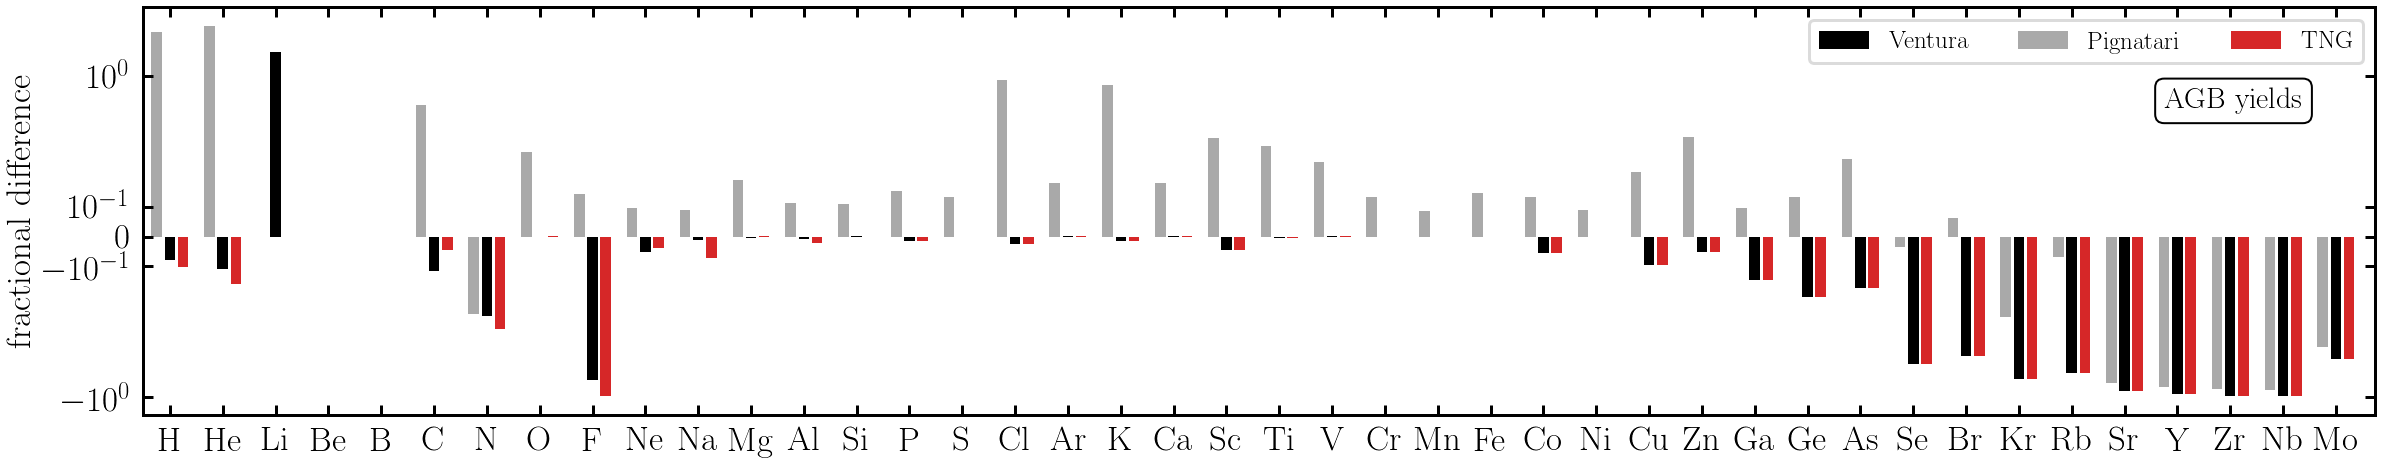

In [277]:
#plottig the result AGB yields changed

## Actual plotting
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(40,7.5))#, dpi=100)
ax = fig.add_subplot(111)

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
           'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']
element_names = [r"$\rm{H}$", r"$\rm{He}$", r"$\rm{Li}$", r"$\rm{Be}$", r"$\rm{B}$", r"$\rm{C}$", r"$\rm{N}$", r"$\rm{O}$", r"$\rm{F}$", r"$\rm{Ne}$", r"$\rm{Na}$", r"$\rm{Mg}$", r"$\rm{Al}$", r"$\rm{Si}$", r"$\rm{P}$", r"$\rm{S}$", r"$\rm{Cl}$", r"$\rm{Ar}$", r"$\rm{K}$",
           r"$\rm{Ca}$", r"$\rm{Sc}$", r"$\rm{Ti}$", r"$\rm{V}$", r"$\rm{Cr}$", r"$\rm{Mn}$", r"$\rm{Fe}$", r"$\rm{Co}$", r"$\rm{Ni}$", r"$\rm{Cu}$", r"$\rm{Zn}$", r"$\rm{Ga}$", r"$\rm{Ge}$", r"$\rm{As}$", r"$\rm{Se}$", r"$\rm{Br}$", r"$\rm{Kr}$", r"$\rm{Rb}$", r"$\rm{Sr}$", r"$\rm{Y}$", r"$\rm{Zr}$", r"$\rm{Nb}$", r"$\rm{Mo}$"]


for i, elem in enumerate(elements):

    tot = np.abs(np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem]))
    tot_alt = np.abs(np.cumsum(basic_ssp_log_alt.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt.agb_table[elem]) + np.cumsum(basic_ssp_log_alt.bh_table[elem]))
    tot_alt2 = np.abs(np.cumsum(basic_ssp_log_alt2.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt2.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt2.agb_table[elem]) + np.cumsum(basic_ssp_log_alt2.bh_table[elem]))
    tot_alt3 = np.abs(np.cumsum(basic_ssp_log_alt3.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt3.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt3.agb_table[elem]) + np.cumsum(basic_ssp_log_alt3.bh_table[elem]))
    if tot_alt[-1] != 0:
        plt.bar(4*(i+1)+1,(tot_alt[-1]-tot[-1])/tot[-1], color='k')
    if tot_alt2[-1] != 0:
        plt.bar(4*(i+1),(tot_alt2[-1]-tot[-1])/tot[-1], color='darkgray')
    if tot_alt3[-1] != 0:
        plt.bar(4*(i+1)+2,(tot_alt3[-1]-tot[-1])/tot[-1], color='tab:red')

plt.bar(0,1e-3,color='k', label=r'$\rm{Ventura}$')
plt.bar(0,1e-3,color='darkgray', label=r'$\rm{Pignatari}$')
plt.bar(0,1e-3,color='tab:red', label=r'$\rm{TNG}$')

ax.legend(loc = 1, ncol=3, fontsize=25)
ax.annotate(xy = (4*(len(elements)-3),0.5) ,s = r'$\rm{AGB\,\,yields}$',color = 'k', bbox=dict(boxstyle="round", fc="w", lw=2), zorder=-2, fontsize=30)

plt.xticks(np.arange(4,4*(len(elements)+1),4)+1, element_names)
#plt.xticks(np.arange(0,len(elements),1)+1, element_names)
#plt.vlines(np.arange(5,5*len(elements),5)+1,-0.2,1.2, color='darkgray',alpha=0.5,zorder=-1)
#plt.ylim(1e-6,1e-1)
plt.xlim(3,4*(len(elements)+1))
#plt.xlim(0,len(elements)+1)
plt.ylabel(r'$\rm{fractional\,\, difference}$') #\,\, between\,\, yield\,\, sets}$')
#plt.yscale('symlog', linthreshy=1e-9)
#ax.set_xticks([])
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.yscale('symlog', linthreshy=4e-1)
plt.savefig("./paper_plots/agb_yield_hist.pdf", bbox_inches='tight')

# different SNII yield sets

In [278]:
# Set up the SSP alternative SNII: Limongi+2018
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "CL18_net")() #chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "Nomoto2013_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = "CL18_net" #'chieffi04_net' #"Nomoto2013_net" #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [279]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [280]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt = SSP_wrap(a)
basic_ssp_log_alt.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)


In [281]:
# Set up the SSP alternative SNII: Nomoto+2013
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
#getattr(basic_sn2, "CL18_net")() #chieffi04_net")()  #"chieffi04_net"
getattr(basic_sn2, "Nomoto2013_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = "Nomoto2013_net" #"CL18_net" #'chieffi04_net' # #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt2 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [282]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt2.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt2.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt2.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [283]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt2 = SSP_wrap(a)
basic_ssp_log_alt2.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)



In [284]:
# Set up the SSP alternative SNII: Portinari+1998
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
#getattr(basic_sn2, "CL18_net")() #chieffi04_net")()  #"chieffi04_net"
getattr(basic_sn2, "Portinari_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = "Portinari_net" #"CL18_net" #'chieffi04_net' # #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt3 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [285]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt3.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt3.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt3.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [286]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt3 = SSP_wrap(a)
basic_ssp_log_alt3.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)




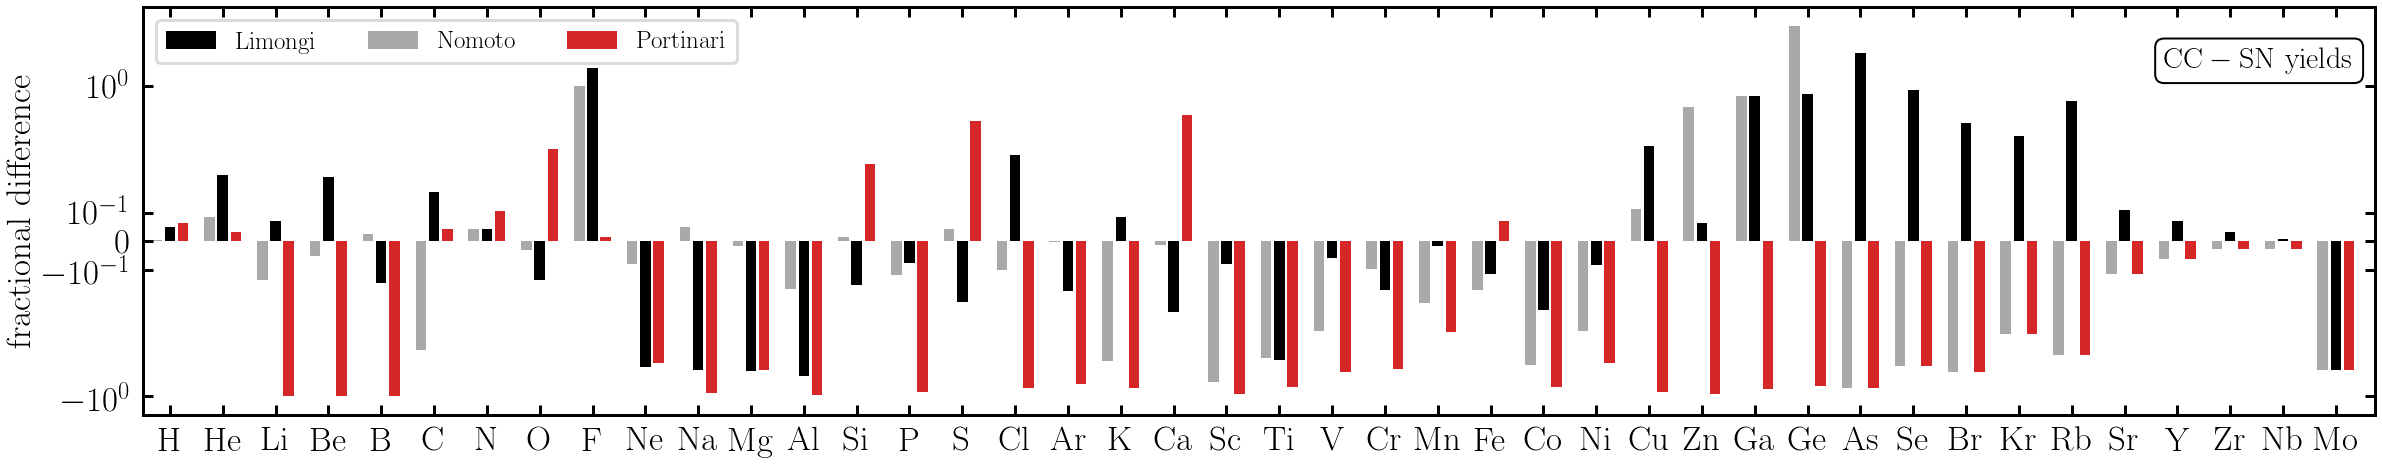

In [287]:
#plottig the result SNII yields changed

## Actual plotting
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(40,7.5))#, dpi=100)
ax = fig.add_subplot(111)

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
           'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']
element_names = [r"$\rm{H}$", r"$\rm{He}$", r"$\rm{Li}$", r"$\rm{Be}$", r"$\rm{B}$", r"$\rm{C}$", r"$\rm{N}$", r"$\rm{O}$", r"$\rm{F}$", r"$\rm{Ne}$", r"$\rm{Na}$", r"$\rm{Mg}$", r"$\rm{Al}$", r"$\rm{Si}$", r"$\rm{P}$", r"$\rm{S}$", r"$\rm{Cl}$", r"$\rm{Ar}$", r"$\rm{K}$",
           r"$\rm{Ca}$", r"$\rm{Sc}$", r"$\rm{Ti}$", r"$\rm{V}$", r"$\rm{Cr}$", r"$\rm{Mn}$", r"$\rm{Fe}$", r"$\rm{Co}$", r"$\rm{Ni}$", r"$\rm{Cu}$", r"$\rm{Zn}$", r"$\rm{Ga}$", r"$\rm{Ge}$", r"$\rm{As}$", r"$\rm{Se}$", r"$\rm{Br}$", r"$\rm{Kr}$", r"$\rm{Rb}$", r"$\rm{Sr}$", r"$\rm{Y}$", r"$\rm{Zr}$", r"$\rm{Nb}$", r"$\rm{Mo}$"]


for i, elem in enumerate(elements):

    tot = np.abs(np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem]))
    tot_alt = np.abs(np.cumsum(basic_ssp_log_alt.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt.agb_table[elem]) + np.cumsum(basic_ssp_log_alt.bh_table[elem]))
    tot_alt2 = np.abs(np.cumsum(basic_ssp_log_alt2.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt2.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt2.agb_table[elem]) + np.cumsum(basic_ssp_log_alt2.bh_table[elem]))
    tot_alt3 = np.abs(np.cumsum(basic_ssp_log_alt3.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt3.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt3.agb_table[elem]) + np.cumsum(basic_ssp_log_alt3.bh_table[elem]))
    if tot_alt[-1] != 0:
        plt.bar(4*(i+1)+1,(tot_alt[-1]-tot[-1])/tot[-1], color='k')
    if tot_alt2[-1] != 0:
        plt.bar(4*(i+1),(tot_alt2[-1]-tot[-1])/tot[-1], color='darkgray')
    if tot_alt3[-1] != 0:
        plt.bar(4*(i+1)+2,(tot_alt3[-1]-tot[-1])/tot[-1], color='tab:red')

plt.bar(0,1e-3,color='k', label=r'$\rm{Limongi}$')
plt.bar(0,1e-3,color='darkgray', label=r'$\rm{Nomoto}$')
plt.bar(0,1e-3,color='tab:red', label=r'$\rm{Portinari}$')

ax.legend(loc = 2, ncol=3, fontsize=25)
ax.annotate(xy = (4*(len(elements)-3),1.5) ,s = r'$\rm{CC-SN\,\,yields}$',color = 'k', bbox=dict(boxstyle="round", fc="w", lw=2), zorder=-2, fontsize=30)

plt.xticks(np.arange(4,4*(len(elements)+1),4)+1, element_names)
#plt.xticks(np.arange(0,len(elements),1)+1, element_names)
#plt.vlines(np.arange(5,5*len(elements),5)+1,-0.2,1.2, color='darkgray',alpha=0.5,zorder=-1)
#plt.ylim(1e-6,1e-1)
plt.xlim(3,4*(len(elements)+1))
#plt.xlim(0,len(elements)+1)
plt.ylabel(r'$\rm{fractional\,\, difference}$') #\,\, between\,\, yield\,\, sets}$')
#plt.yscale('symlog', linthreshy=1e-9)
#ax.set_xticks([])
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.yscale('symlog', linthreshy=4e-1)
plt.savefig("./paper_plots/snii_yield_hist.pdf", bbox_inches='tight')

In [302]:
# Set up the SSP alternative SNII: Nugrid
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "NuGrid_net")() #chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "Nomoto2013_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = "NuGrid_net" #'chieffi04_net' #"Nomoto2013_net" #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [303]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [304]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt = SSP_wrap(a)
basic_ssp_log_alt.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)



In [305]:
# Set up the SSP alternative SNII: West+2017
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
#getattr(basic_sn2, "CL18_net")() #chieffi04_net")()  #"chieffi04_net"
getattr(basic_sn2, "West17_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = "West17_net" #"CL18_net" #'chieffi04_net' # #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt2 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [306]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt2.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt2.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt2.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [307]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt2 = SSP_wrap(a)
basic_ssp_log_alt2.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)


In [308]:
# Set up the SSP alternative SNII: Frischknecht+2016
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
#getattr(basic_sn2, "CL18_net")() #chieffi04_net")()  #"chieffi04_net"
getattr(basic_sn2, "Frischknecht16_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = "Frischknecht16_net" #"CL18_net" #'chieffi04_net' # #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt3 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [309]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt3.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt3.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt3.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [310]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt3 = SSP_wrap(a)
basic_ssp_log_alt3.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)


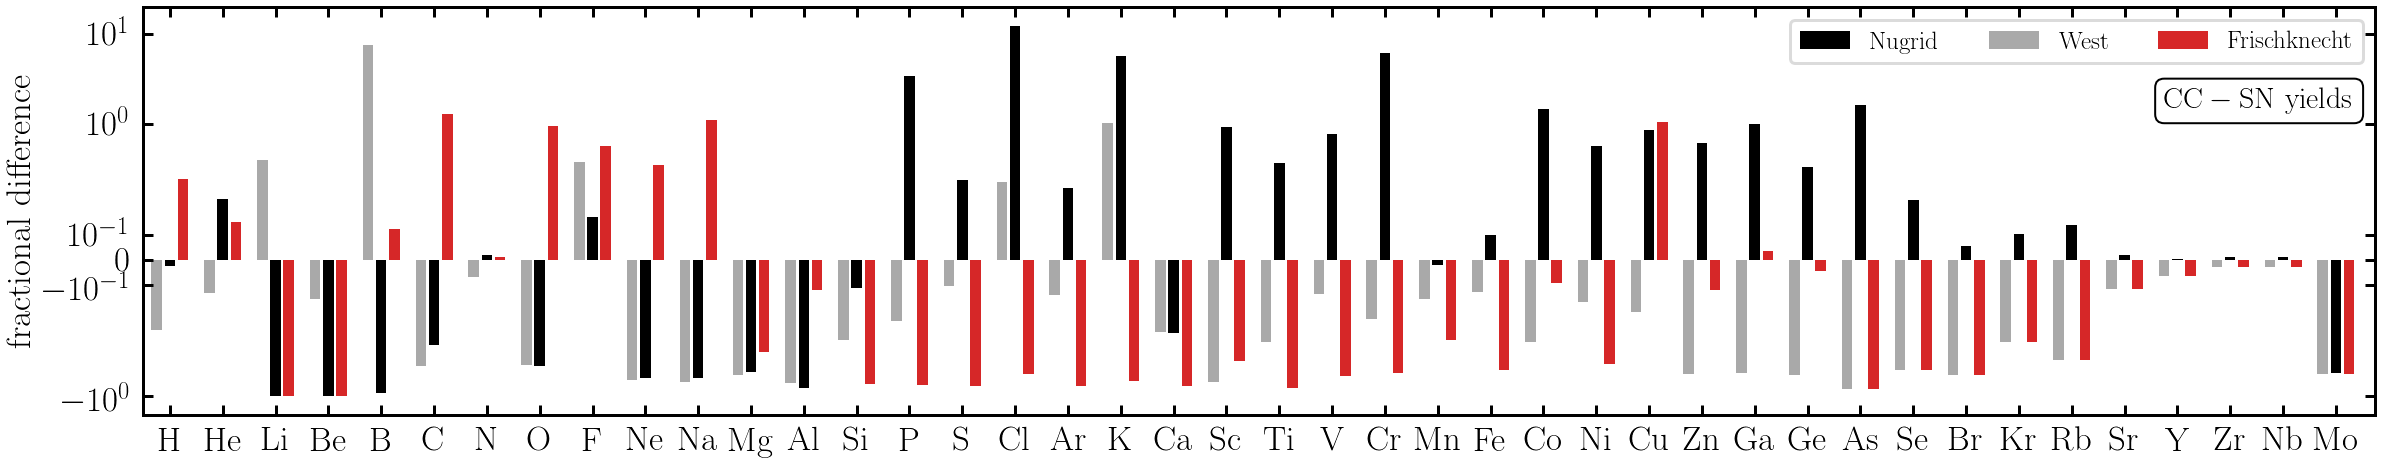

In [267]:
#plottig the result SNII yields changed

## Actual plotting
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(40,7.5))#, dpi=100)
ax = fig.add_subplot(111)

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
           'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']
element_names = [r"$\rm{H}$", r"$\rm{He}$", r"$\rm{Li}$", r"$\rm{Be}$", r"$\rm{B}$", r"$\rm{C}$", r"$\rm{N}$", r"$\rm{O}$", r"$\rm{F}$", r"$\rm{Ne}$", r"$\rm{Na}$", r"$\rm{Mg}$", r"$\rm{Al}$", r"$\rm{Si}$", r"$\rm{P}$", r"$\rm{S}$", r"$\rm{Cl}$", r"$\rm{Ar}$", r"$\rm{K}$",
           r"$\rm{Ca}$", r"$\rm{Sc}$", r"$\rm{Ti}$", r"$\rm{V}$", r"$\rm{Cr}$", r"$\rm{Mn}$", r"$\rm{Fe}$", r"$\rm{Co}$", r"$\rm{Ni}$", r"$\rm{Cu}$", r"$\rm{Zn}$", r"$\rm{Ga}$", r"$\rm{Ge}$", r"$\rm{As}$", r"$\rm{Se}$", r"$\rm{Br}$", r"$\rm{Kr}$", r"$\rm{Rb}$", r"$\rm{Sr}$", r"$\rm{Y}$", r"$\rm{Zr}$", r"$\rm{Nb}$", r"$\rm{Mo}$"]


for i, elem in enumerate(elements):

    tot = np.abs(np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem]))
    tot_alt = np.abs(np.cumsum(basic_ssp_log_alt.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt.agb_table[elem]) + np.cumsum(basic_ssp_log_alt.bh_table[elem]))
    tot_alt2 = np.abs(np.cumsum(basic_ssp_log_alt2.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt2.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt2.agb_table[elem]) + np.cumsum(basic_ssp_log_alt2.bh_table[elem]))
    tot_alt3 = np.abs(np.cumsum(basic_ssp_log_alt3.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt3.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt3.agb_table[elem]) + np.cumsum(basic_ssp_log_alt3.bh_table[elem]))
    if tot_alt[-1] != 0:
        plt.bar(4*(i+1)+1,(tot_alt[-1]-tot[-1])/tot[-1], color='k')
    if tot_alt2[-1] != 0:
        plt.bar(4*(i+1),(tot_alt2[-1]-tot[-1])/tot[-1], color='darkgray')
    if tot_alt3[-1] != 0:
        plt.bar(4*(i+1)+2,(tot_alt3[-1]-tot[-1])/tot[-1], color='tab:red')

plt.bar(0,1e-3,color='k', label=r'$\rm{Nugrid}$')
plt.bar(0,1e-3,color='darkgray', label=r'$\rm{West}$')
plt.bar(0,1e-3,color='tab:red', label=r'$\rm{Frischknecht}$')

ax.legend(loc = 1, ncol=3, fontsize=25)
ax.annotate(xy = (4*(len(elements)-3),1.5) ,s = r'$\rm{CC-SN\,\,yields}$',color = 'k', bbox=dict(boxstyle="round", fc="w", lw=2), zorder=-2, fontsize=30)

plt.xticks(np.arange(4,4*(len(elements)+1),4)+1, element_names)
#plt.xticks(np.arange(0,len(elements),1)+1, element_names)
#plt.vlines(np.arange(5,5*len(elements),5)+1,-0.2,1.2, color='darkgray',alpha=0.5,zorder=-1)
#plt.ylim(1e-6,1e-1)
plt.xlim(3,4*(len(elements)+1))
#plt.xlim(0,len(elements)+1)
plt.ylabel(r'$\rm{fractional\,\, difference}$') #\,\, between\,\, yield\,\, sets}$')
#plt.yscale('symlog', linthreshy=1e-9)
#ax.set_xticks([])
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.yscale('symlog', linthreshy=4e-1)
plt.savefig("./paper_plots/snii_alt_yield_hist.pdf", bbox_inches='tight')

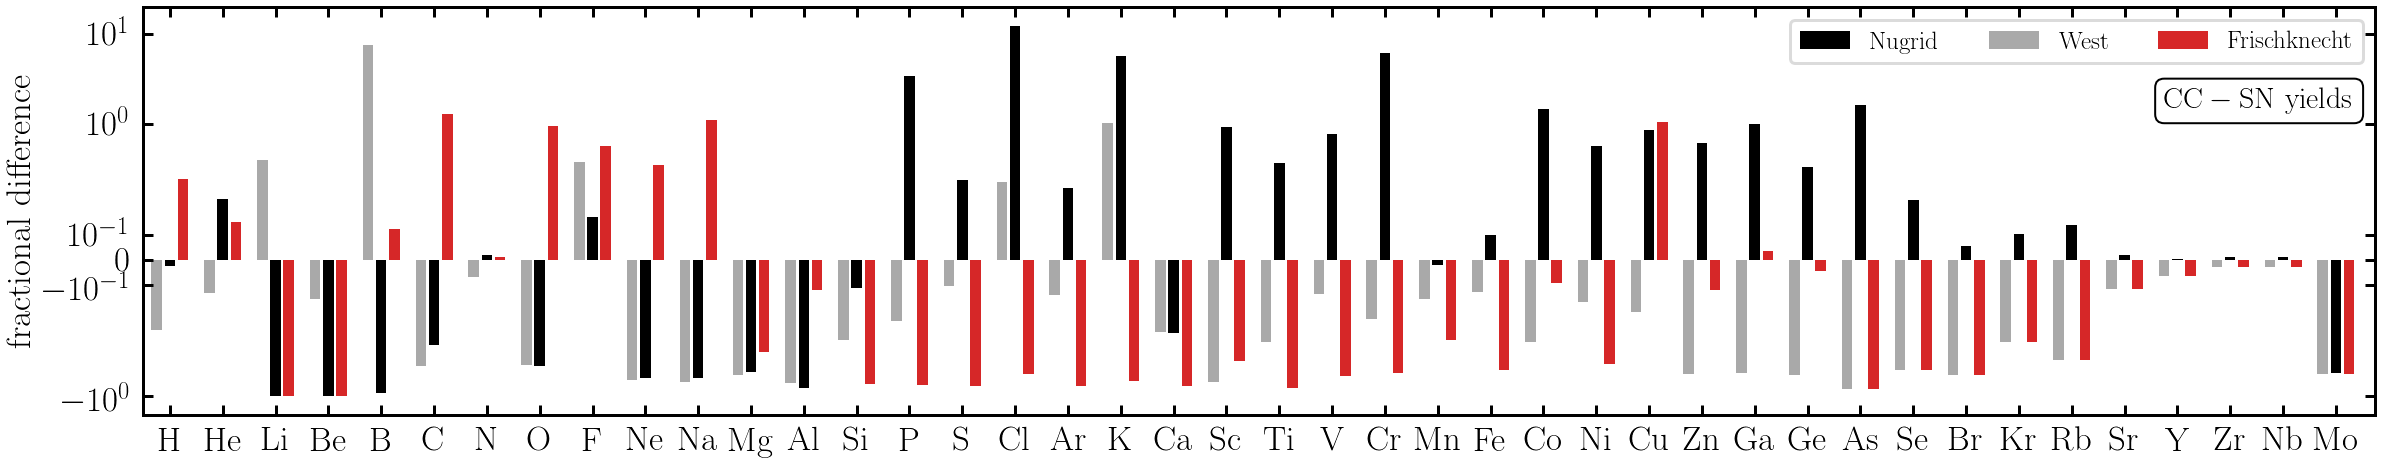

In [311]:
#plottig the result SNII yields changed

## Actual plotting
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(40,7.5))#, dpi=100)
ax = fig.add_subplot(111)

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
           'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']
element_names = [r"$\rm{H}$", r"$\rm{He}$", r"$\rm{Li}$", r"$\rm{Be}$", r"$\rm{B}$", r"$\rm{C}$", r"$\rm{N}$", r"$\rm{O}$", r"$\rm{F}$", r"$\rm{Ne}$", r"$\rm{Na}$", r"$\rm{Mg}$", r"$\rm{Al}$", r"$\rm{Si}$", r"$\rm{P}$", r"$\rm{S}$", r"$\rm{Cl}$", r"$\rm{Ar}$", r"$\rm{K}$",
           r"$\rm{Ca}$", r"$\rm{Sc}$", r"$\rm{Ti}$", r"$\rm{V}$", r"$\rm{Cr}$", r"$\rm{Mn}$", r"$\rm{Fe}$", r"$\rm{Co}$", r"$\rm{Ni}$", r"$\rm{Cu}$", r"$\rm{Zn}$", r"$\rm{Ga}$", r"$\rm{Ge}$", r"$\rm{As}$", r"$\rm{Se}$", r"$\rm{Br}$", r"$\rm{Kr}$", r"$\rm{Rb}$", r"$\rm{Sr}$", r"$\rm{Y}$", r"$\rm{Zr}$", r"$\rm{Nb}$", r"$\rm{Mo}$"]


for i, elem in enumerate(elements):

    tot = np.abs(np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem]))
    tot_alt = np.abs(np.cumsum(basic_ssp_log_alt.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt.agb_table[elem]) + np.cumsum(basic_ssp_log_alt.bh_table[elem]))
    tot_alt2 = np.abs(np.cumsum(basic_ssp_log_alt2.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt2.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt2.agb_table[elem]) + np.cumsum(basic_ssp_log_alt2.bh_table[elem]))
    tot_alt3 = np.abs(np.cumsum(basic_ssp_log_alt3.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt3.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt3.agb_table[elem]) + np.cumsum(basic_ssp_log_alt3.bh_table[elem]))
    if tot_alt[-1] != 0:
        plt.bar(4*(i+1)+1,(tot_alt[-1]-tot[-1])/tot[-1], color='k')
    if tot_alt2[-1] != 0:
        plt.bar(4*(i+1),(tot_alt2[-1]-tot[-1])/tot[-1], color='darkgray')
    if tot_alt3[-1] != 0:
        plt.bar(4*(i+1)+2,(tot_alt3[-1]-tot[-1])/tot[-1], color='tab:red')

plt.bar(0,1e-3,color='k', label=r'$\rm{Nugrid}$')
plt.bar(0,1e-3,color='darkgray', label=r'$\rm{West}$')
plt.bar(0,1e-3,color='tab:red', label=r'$\rm{Frischknecht}$')

ax.legend(loc = 1, ncol=3, fontsize=25)
ax.annotate(xy = (4*(len(elements)-3),1.5) ,s = r'$\rm{CC-SN\,\,yields}$',color = 'k', bbox=dict(boxstyle="round", fc="w", lw=2), zorder=-2, fontsize=30)

plt.xticks(np.arange(4,4*(len(elements)+1),4)+1, element_names)
#plt.xticks(np.arange(0,len(elements),1)+1, element_names)
#plt.vlines(np.arange(5,5*len(elements),5)+1,-0.2,1.2, color='darkgray',alpha=0.5,zorder=-1)
#plt.ylim(1e-6,1e-1)
plt.xlim(3,4*(len(elements)+1))
#plt.xlim(0,len(elements)+1)
plt.ylabel(r'$\rm{fractional\,\, difference}$') #\,\, between\,\, yield\,\, sets}$')
#plt.yscale('symlog', linthreshy=1e-9)
#ax.set_xticks([])
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.yscale('symlog', linthreshy=4e-1)
plt.savefig("./paper_plots/snii_alt_yield_hist.pdf", bbox_inches='tight')

In [312]:
# Set up the SSP alternative SNII: TNG_net
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
#getattr(basic_sn2, "CL18_net")() #chieffi04_net")()  #"chieffi04_net"
getattr(basic_sn2, "TNG_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = "TNG_net" #"CL18_net" #'chieffi04_net' # #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "Seitenzahl" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt3 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [313]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt3.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt3.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt3.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [314]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt3 = SSP_wrap(a)
basic_ssp_log_alt3.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)



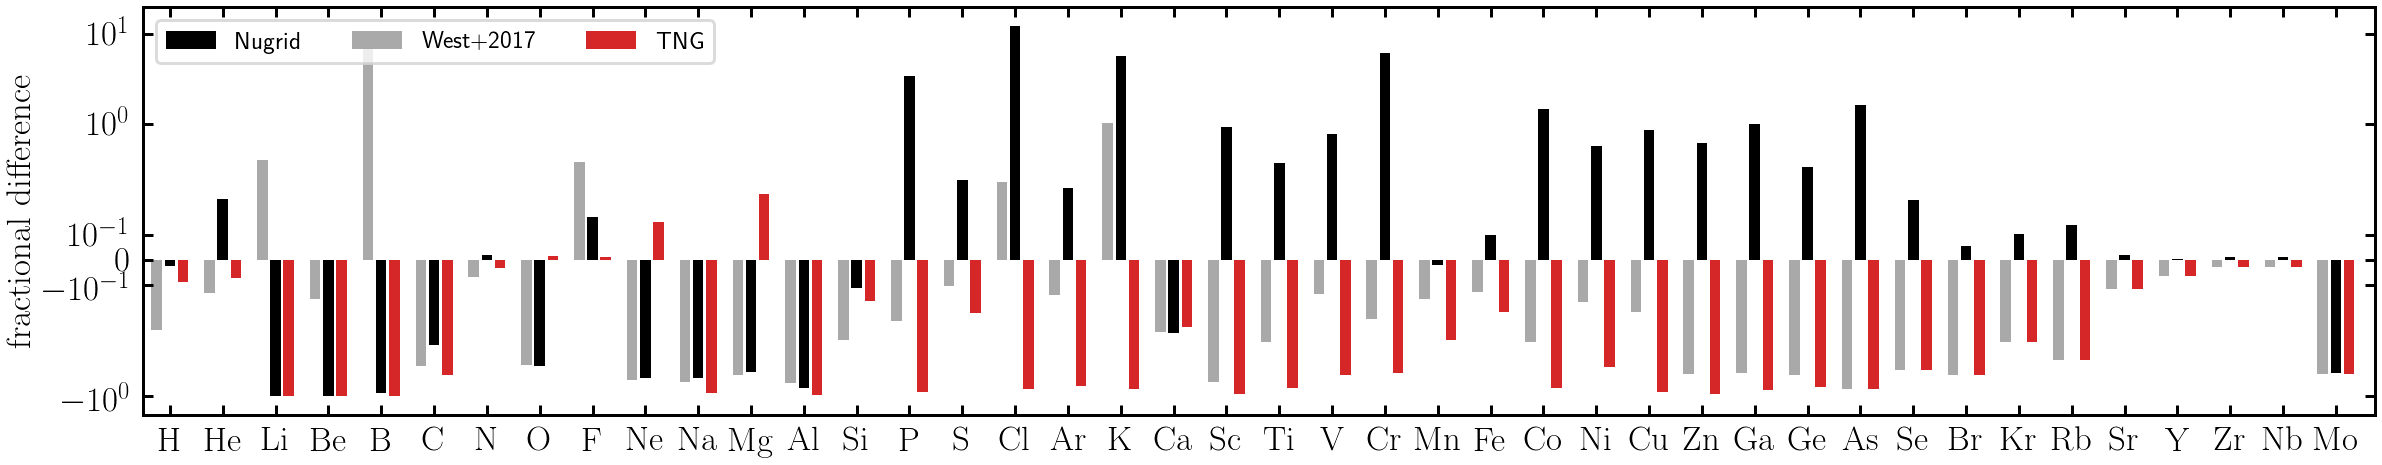

In [315]:
#plottig the result SNII yields changed

## Actual plotting
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(40,7.5))#, dpi=100)
ax = fig.add_subplot(111)

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
           'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']
element_names = [r"$\rm{H}$", r"$\rm{He}$", r"$\rm{Li}$", r"$\rm{Be}$", r"$\rm{B}$", r"$\rm{C}$", r"$\rm{N}$", r"$\rm{O}$", r"$\rm{F}$", r"$\rm{Ne}$", r"$\rm{Na}$", r"$\rm{Mg}$", r"$\rm{Al}$", r"$\rm{Si}$", r"$\rm{P}$", r"$\rm{S}$", r"$\rm{Cl}$", r"$\rm{Ar}$", r"$\rm{K}$",
           r"$\rm{Ca}$", r"$\rm{Sc}$", r"$\rm{Ti}$", r"$\rm{V}$", r"$\rm{Cr}$", r"$\rm{Mn}$", r"$\rm{Fe}$", r"$\rm{Co}$", r"$\rm{Ni}$", r"$\rm{Cu}$", r"$\rm{Zn}$", r"$\rm{Ga}$", r"$\rm{Ge}$", r"$\rm{As}$", r"$\rm{Se}$", r"$\rm{Br}$", r"$\rm{Kr}$", r"$\rm{Rb}$", r"$\rm{Sr}$", r"$\rm{Y}$", r"$\rm{Zr}$", r"$\rm{Nb}$", r"$\rm{Mo}$"]


for i, elem in enumerate(elements):

    tot = np.abs(np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem]))
    tot_alt = np.abs(np.cumsum(basic_ssp_log_alt.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt.agb_table[elem]) + np.cumsum(basic_ssp_log_alt.bh_table[elem]))
    tot_alt2 = np.abs(np.cumsum(basic_ssp_log_alt2.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt2.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt2.agb_table[elem]) + np.cumsum(basic_ssp_log_alt2.bh_table[elem]))
    tot_alt3 = np.abs(np.cumsum(basic_ssp_log_alt3.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt3.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt3.agb_table[elem]) + np.cumsum(basic_ssp_log_alt3.bh_table[elem]))
    if tot_alt[-1] != 0:
        plt.bar(4*(i+1)+1,(tot_alt[-1]-tot[-1])/tot[-1], color='k')
    if tot_alt2[-1] != 0:
        plt.bar(4*(i+1),(tot_alt2[-1]-tot[-1])/tot[-1], color='darkgray')
    if tot_alt3[-1] != 0:
        plt.bar(4*(i+1)+2,(tot_alt3[-1]-tot[-1])/tot[-1], color='tab:red')

plt.bar(0,1e-3,color='k', label='Nugrid')
plt.bar(0,1e-3,color='darkgray', label='West+2017')
plt.bar(0,1e-3,color='tab:red', label='TNG')

ax.legend(loc = 2, ncol=3, fontsize=25)

plt.xticks(np.arange(4,4*(len(elements)+1),4)+1, element_names)
#plt.xticks(np.arange(0,len(elements),1)+1, element_names)
#plt.vlines(np.arange(5,5*len(elements),5)+1,-0.2,1.2, color='darkgray',alpha=0.5,zorder=-1)
#plt.ylim(1e-6,1e-1)
plt.xlim(3,4*(len(elements)+1))
#plt.xlim(0,len(elements)+1)
plt.ylabel(r'$\rm{fractional\,\, difference}$') #\,\, between\,\, yield\,\, sets}$')
#plt.yscale('symlog', linthreshy=1e-9)
#ax.set_xticks([])
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.yscale('symlog', linthreshy=4e-1)
plt.show()

# different SNIa yields

In [288]:
# Set up the SSP alternative SNIa: Iwamoto+1999
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "Nomoto2013_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Iwamoto")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = 'chieffi04_net' #"Nomoto2013_net" #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "Iwamoto" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [289]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [290]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt = SSP_wrap(a)
basic_ssp_log_alt.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)



In [291]:
# Set up the SSP alternative SNII: Thielemann
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "Nomoto2013_net")()
basic_1a = SN1a_feedback()
#getattr(basic_1a, "Seitenzahl")()
getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = 'chieffi04_net' # #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = 'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt2 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

In [292]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt2.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt2.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt2.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [293]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt2 = SSP_wrap(a)
basic_ssp_log_alt2.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)


In [294]:
# Set up the SSP alternative SNII: TNG Nomoto1997
from Chempy.imf import IMF
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar, 'Asplund09')()

#chabrier
a.mass_steps = 200000 #2000 # 200000
a.imf_type_name = 'Chabrier_1'
a.chabrier_para1 = 0.69
a.chabrier_para2 = 0.079
a.high_mass_slope = -2.3
a.imf_parameter = (a.chabrier_para1, a.chabrier_para2, a.high_mass_slope)
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.high_mass_slope))

# Load the yields of the default yield set

from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback 
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04_net")()  #"chieffi04_net"
#getattr(basic_sn2, "Portinari_net")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "TNG")()
#getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas16_net")() #"Karakas16_net"
#getattr(basic_agb, "Ventura_net")()

a.yield_table_name_sn2 = 'chieffi04_net' # #
a.yield_table_name_agb = "Karakas16_net"
a.yield_table_name_1a = "TNG" #'Thielemann'

a.sn1a_time_delay = np.power(10,-1.39794) #40 Myr
a.N_0 = maoz2012#/15.*13.88 #np.power(10,-2.85)
a.sn1a_parameter = [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy]

# Initialise the SSP class with time-steps

#time_steps = np.linspace(0.,13.8,4096)
# for smoot plotting for paper
#time_steps =  np.linspace(0,13.8,16384)
from Chempy.weighted_yield import SSP
basic_ssp_alt3 = SSP(False, np.copy(basic_solar.z), np.copy(basic_imf.x), np.copy(basic_imf.dm), np.copy(basic_imf.dn), np.copy(time_steps), list(elements_to_trace), 'Argast_2000', 'logarithmic', False)

/Users/buck/.local/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:92: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.masses = list([np.sum(f['Yield'].value)]) # sum of all yields


In [295]:
# Each nucleosynthetic process has its own method on the SSP class and adds its feedback into the final table

basic_ssp_alt3.sn2_feedback(list(basic_sn2.elements), dict(basic_sn2.table), np.copy(basic_sn2.metallicities), float(a.sn2mmin), float(a.sn2mmax),list(solar_fractions))
basic_ssp_alt3.agb_feedback(list(basic_agb.elements), dict(basic_agb.table), list(basic_agb.metallicities), float(a.agbmmin), float(a.agbmmax),list(solar_fractions))
basic_ssp_alt3.sn1a_feedback(list(basic_1a.elements), list(basic_1a.metallicities), dict(basic_1a.table), str(a.time_delay_functional_form), float(a.sn1ammin), float(a.sn1ammax), [a.N_0,a.sn1a_time_delay,a.sn1a_exponent,a.dummy],float(a.total_mass), a.stochastic_IMF)
#basic_ssp.bh_feedback(a.bhmmin,a.bhmmax,list(basic_sn2.element_list),fractions_in_gas,percentage_of_bh_mass)

In [296]:
# in log time
list_of_metallicities = np.array([0.0134]) #np.logspace(-1.3,-1.3,1)
time_steps_log =  np.logspace(-2.47,1.139879,250)
a.log_time = True
a.sn1a_time_delay = np.power(10,-1.39794)
basic_ssp_log_alt3 = SSP_wrap(a)
basic_ssp_log_alt3.calculate_feedback(list_of_metallicities,list(elements_to_trace),list(solar_fractions),np.copy(time_steps_log),1.)



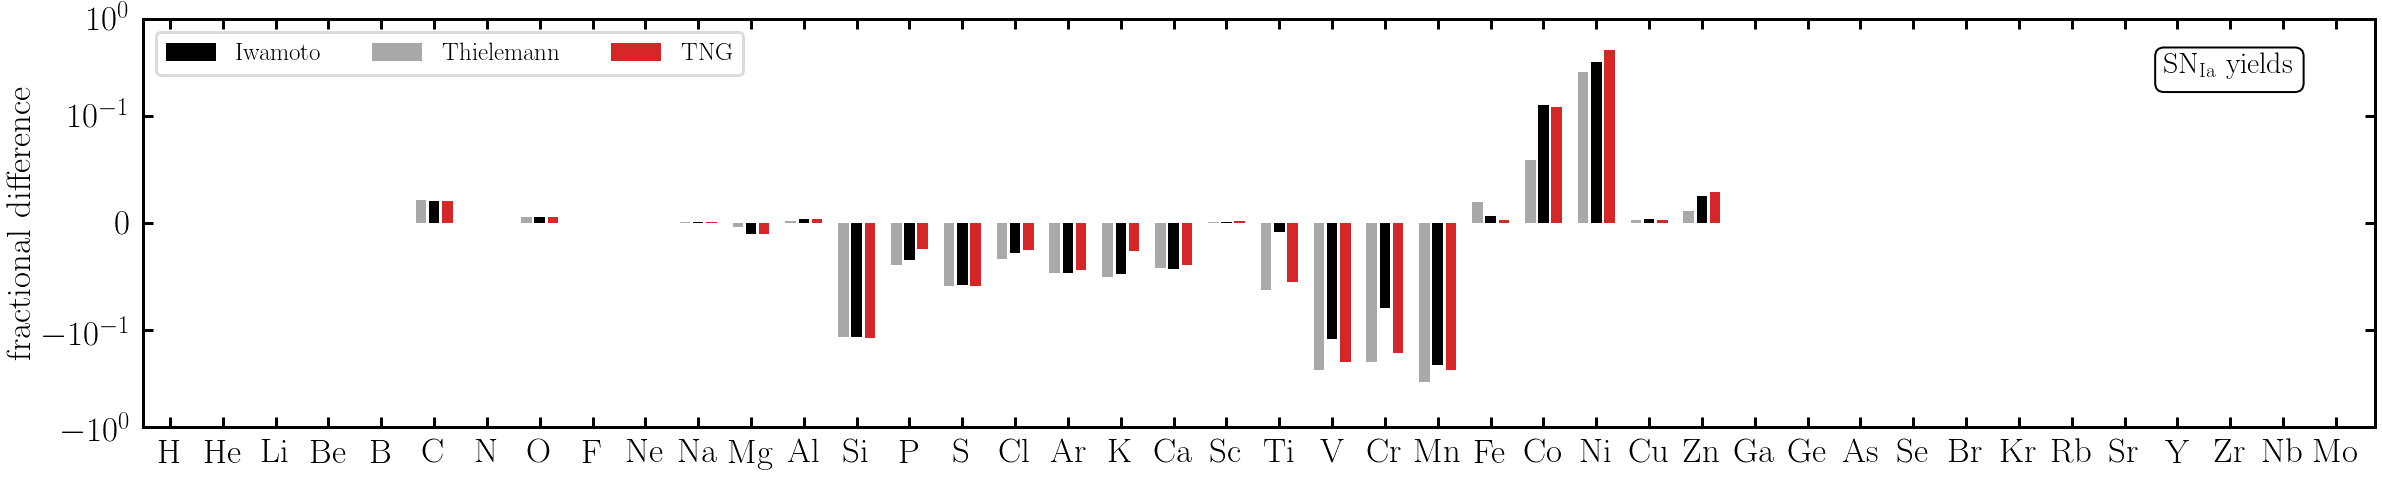

In [297]:
#plottig the result SNIa yields changed

## Actual plotting
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(40,7.5))#, dpi=100)
ax = fig.add_subplot(111)

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
           'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']
element_names = [r"$\rm{H}$", r"$\rm{He}$", r"$\rm{Li}$", r"$\rm{Be}$", r"$\rm{B}$", r"$\rm{C}$", r"$\rm{N}$", r"$\rm{O}$", r"$\rm{F}$", r"$\rm{Ne}$", r"$\rm{Na}$", r"$\rm{Mg}$", r"$\rm{Al}$", r"$\rm{Si}$", r"$\rm{P}$", r"$\rm{S}$", r"$\rm{Cl}$", r"$\rm{Ar}$", r"$\rm{K}$",
           r"$\rm{Ca}$", r"$\rm{Sc}$", r"$\rm{Ti}$", r"$\rm{V}$", r"$\rm{Cr}$", r"$\rm{Mn}$", r"$\rm{Fe}$", r"$\rm{Co}$", r"$\rm{Ni}$", r"$\rm{Cu}$", r"$\rm{Zn}$", r"$\rm{Ga}$", r"$\rm{Ge}$", r"$\rm{As}$", r"$\rm{Se}$", r"$\rm{Br}$", r"$\rm{Kr}$", r"$\rm{Rb}$", r"$\rm{Sr}$", r"$\rm{Y}$", r"$\rm{Zr}$", r"$\rm{Nb}$", r"$\rm{Mo}$"]


for i, elem in enumerate(elements):

    tot = np.abs(np.cumsum(basic_ssp_log.sn2_table[elem]) + np.cumsum(basic_ssp_log.sn1a_table[elem]) + np.cumsum(basic_ssp_log.agb_table[elem]) + np.cumsum(basic_ssp_log.bh_table[elem]))
    tot_alt = np.abs(np.cumsum(basic_ssp_log_alt.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt.agb_table[elem]) + np.cumsum(basic_ssp_log_alt.bh_table[elem]))
    tot_alt2 = np.abs(np.cumsum(basic_ssp_log_alt2.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt2.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt2.agb_table[elem]) + np.cumsum(basic_ssp_log_alt2.bh_table[elem]))
    tot_alt3 = np.abs(np.cumsum(basic_ssp_log_alt3.sn2_table[elem]) + np.cumsum(basic_ssp_log_alt3.sn1a_table[elem]) + np.cumsum(basic_ssp_log_alt3.agb_table[elem]) + np.cumsum(basic_ssp_log_alt3.bh_table[elem]))
    if tot_alt[-1] != 0:
        plt.bar(4*(i+1)+1,(tot_alt[-1]-tot[-1])/tot[-1], color='k')
    if tot_alt2[-1] != 0:
        plt.bar(4*(i+1),(tot_alt2[-1]-tot[-1])/tot[-1], color='darkgray')
    if tot_alt3[-1] != 0:
        plt.bar(4*(i+1)+2,(tot_alt3[-1]-tot[-1])/tot[-1], color='tab:red')

plt.bar(0,1e-3,color='k', label=r'$\rm{Iwamoto}$')
plt.bar(0,1e-3,color='darkgray', label=r'$\rm{Thielemann}$')
plt.bar(0,1e-3,color='tab:red', label=r'$\rm{TNG}$')

ax.legend(loc = 2, ncol=3, fontsize=25)
ax.annotate(xy = (4*(len(elements)-3),0.25) ,s = r'$\rm{SN_{Ia}\,\,yields}$',color = 'k', bbox=dict(boxstyle="round", fc="w", lw=2), zorder=-2, fontsize=30)

plt.xticks(np.arange(4,4*(len(elements)+1),4)+1, element_names)

plt.xlim(3,4*(len(elements)+1))
#plt.xlim(0,len(elements)+1)
plt.ylabel(r'$\rm{fractional\,\, difference}$') #\,\, between\,\, yield\,\, sets}$')
#plt.yscale('symlog', linthreshy=1e-9)
#ax.set_xticks([])
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.title(r'$\rm{SN_{Ia}\,\,yield\,\,sets}$', fontsize=40)
plt.yscale('symlog', linthreshy=1e-1)
plt.ylim(-1,1)
plt.savefig("./paper_plots/snia_yield_hist.pdf", bbox_inches='tight')

# Currently implemented yield tables in Chempy

In [10]:
print('Available CC-SN yield parameter range')
for item in ['chieffi04','OldNugrid','Nomoto2013','Portinari_net','francois', 'chieffi04_net', 'Nomoto2013_net','NuGrid_net','West17_net','TNG_net','CL18_net','Frischknecht16_net']:
    basic_sn2 = SN2_feedback()
    getattr(basic_sn2, item)()
    print('----------------------------------')
    print('yield table name: ',item)
    print('provided masses: ', basic_sn2.masses)
    print('provided metallicities',basic_sn2.metallicities)

Available CC-SN yield parameter range
----------------------------------
yield table name:  chieffi04
provided masses:  [13, 15, 20, 25, 30, 35]
provided metallicities [0.e+00 1.e-06 1.e-04 1.e-03 6.e-03 2.e-02]
----------------------------------
yield table name:  OldNugrid
provided masses:  [15 20 25 32 60]
provided metallicities [0.02, 0.01]
----------------------------------
yield table name:  Nomoto2013
provided masses:  [13 15 18 20 25 30 40]
provided metallicities [0.05, 0.02, 0.008, 0.004, 0.001]
----------------------------------
yield table name:  Portinari_net
provided masses:  [6.0, 7.0, 9.0, 12.0, 15.0, 20.0, 30.0, 40.0, 60.0, 100.0, 120.0]
provided metallicities [0.0004, 0.004, 0.008, 0.02, 0.05]
----------------------------------
yield table name:  francois
provided masses:  [ 11.  12.  13.  15.  18.  19.  20.  22.  25.  30.  35.  40.  50.  60.
  70.  80.  90. 100.]
provided metallicities [0.02]
----------------------------------
yield table name:  chieffi04_net
provided

/Users/buck/anaconda3/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:1289: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.metallicities = list(f['Metallicities'].value)
/Users/buck/anaconda3/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:1290: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.masses = f['Masses'].value
/Users/buck/anaconda3/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:1297: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  z_name = f['Yield_names'].value[z_index].decode('utf-8')
/Users/buck/anaconda3/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:1300: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ejecta_mass = f['Yields/'+z_name+'/Ejected_mass'].value


----------------------------------
yield table name:  TNG_net
provided masses:  [  8.   9.  12.  13.  15.  18.  20.  25.  30.  40.  60. 100. 120.]
provided metallicities [0.0, 0.001, 0.004, 0.02]
----------------------------------
yield table name:  CL18_net
provided masses:  [ 13  15  20  25  30  40  60  80 120]
provided metallicities [0.0134, 0.00134, 0.000134, 1.34e-05]
----------------------------------
yield table name:  Frischknecht16_net
provided masses:  [15 20 25 40]
provided metallicities [0.0134, 0.001, 1e-05]


In [11]:
a.yield_table_name_1a_list

['Iwamoto', 'Thielemann', 'Seitenzahl', 'TNG']

In [12]:
a.yield_table_name_agb_list

['Karakas',
 'Nugrid',
 'Karakas_net_yield',
 'Ventura_net',
 'Karakas16_net',
 'TNG_net',
 'Nomoto2013']

In [13]:
a.yield_table_name_hn_list

['Nomoto2013']

In [15]:
print('Available AGB yield parameter range')
for item in ['Karakas','Nugrid','Karakas_net_yield','Ventura_net','Karakas16_net','TNG_net']:#,'Nomoto2013']:
    basic_agb = AGB_feedback()
    getattr(basic_agb, item)()
    print('----------------------------------')
    print('yield table name: ',item)
    print('provided masses: ', basic_agb.masses)
    print('provided metallicities',basic_agb.metallicities)

Available AGB yield parameter range
----------------------------------
yield table name:  Karakas
provided masses:  [1.   1.25 1.5  1.75 1.9  2.   2.25 2.5  3.   3.5  4.   4.5  5.   5.5
 6.   6.5 ]
provided metallicities [0.02, 0.008, 0.004, 0.0001]
----------------------------------
yield table name:  Nugrid
provided masses:  [1.65 2.   3.   5.  ]
provided metallicities [0.02, 0.01]
----------------------------------
yield table name:  Karakas_net_yield
provided masses:  [1.   1.25 1.5  1.75 1.9  2.   2.25 2.5  3.   3.5  4.   4.5  5.   5.5
 6.   6.5 ]
provided metallicities [0.02, 0.008, 0.004, 0.0001]
----------------------------------
yield table name:  Ventura_net
provided masses:  [8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5  2.25 2.
 1.75 1.5  1.25 1.  ]
provided metallicities [0.04, 0.018, 0.008, 0.004, 0.001, 0.0003]
----------------------------------
yield table name:  Karakas16_net
provided masses:  [8.   7.   6.   5.5  5.   4.75 4.5  4.25 4.   3.75 3.5  3.25 3

In [16]:
print('Available SN Ia yield parameter range')
for item in a.yield_table_name_1a_list:
    basic_1a = SN1a_feedback()
    getattr(basic_1a, item)()
    print('----------------------------------')
    print('yield table name: ',item)
    print('provided masses: ', basic_1a.masses)
    print('provided metallicities',basic_1a.metallicities)

Available SN Ia yield parameter range
----------------------------------
yield table name:  Iwamoto
provided masses:  [1.38]
provided metallicities [0.02, 0.0]
----------------------------------
yield table name:  Thielemann
provided masses:  [1.37409]
provided metallicities [0.02]
----------------------------------
yield table name:  Seitenzahl
provided masses:  [1.4004633930489443]
provided metallicities [0.02]
----------------------------------
yield table name:  TNG
provided masses:  [1.3743416]
provided metallicities [0.02]


/Users/buck/anaconda3/lib/python3.6/site-packages/Chempy-0.2-py3.6.egg/Chempy/yields.py:92: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.masses = list([np.sum(f['Yield'].value)]) # sum of all yields


In [18]:
from Chempy.parameter import ModelParameters
from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback, Hypernova_feedback
# Then for Hypernovae

print('Available HN yield parameter range')
for item in a.yield_table_name_hn_list:
    basic_hn = Hypernova_feedback()
    getattr(basic_hn, item)()
    print('----------------------------------')
    print('yield table name: ',item)
    print('provided masses: ', basic_hn.masses)
    print('provided metallicities',basic_hn.metallicities)

Available HN yield parameter range
----------------------------------
yield table name:  Nomoto2013
provided masses:  [20 25 30 40]
provided metallicities [0.05, 0.02, 0.008, 0.004, 0.001]
